In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('shoesfinal.csv')
df = df.drop('Unnamed: 0',axis=1)
df

,Name,Number_of_colour,Product_Code,Reviews,Rating,gender,brand,colour1,colour2,colour3,colour4,selling_price,quality,type,all_sizes,size_count,discount,Types1,Types2,colors_count
0,Star Vital Women's Training Shoes\nPUMA Black-...,2.0,Style: 194331_19,Love the look the comfort the style the price ...,4.0,women,Puma,PUMA Black,PUMA Silver,NaN,NaN,2656.0,average,NaN,"5,6,6,7,7,8,8,9,9,10,10,11",12.0,yes,0,0,2
1,Better Foam Prowl Slip-On Wide Women's Trainin...,1.0,Style: 376927_02,I purchase these abt 6 wks ago. The only compl...,3.0,women,Puma,Puma Black,Puma Black,NaN,NaN,2905.0,average,NaN,"5,6,6,7,7,8,8,9,9,10,10,11",12.0,yes,0,0,2
2,Suede Classic XXI Women's Sneakers\nIcy Blue-P...,7.0,Style: 381410_85,These sneakers are cute and comfortable. They ...,4.0,women,Puma,Icy Blue,PUMA White,NaN,NaN,3237.0,good,NaN,"6,6,7,7,8,8,9,9,10,10,11",11.0,yes,0,0,2
3,Ella Lace Up Women's Shoes\nPuma White-Puma Si...,2.0,Style: 193919_01,First time buying Puma shoes and really glad I...,4.0,women,Puma,Puma White,Puma Silver,NaN,NaN,2490.0,average,NaN,"5,6,6,7,7,8,8,9,9,10,10,11",12.0,yes,0,0,2
4,Star Vital Women's Training Shoes\nPuma Black-...,2.0,Style: 194331_15,Love the look the comfort the style the price ...,4.0,women,Puma,Puma Black,Rose Gold,NaN,NaN,2656.0,average,NaN,"5,6,6,7,7,8,8,9,9,10,10,11",12.0,yes,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Ultrabounce Shoes,13.0,Upper contains a minimum of 50% recycled content,"Nice product\nDecember 12, 2023",4.6,men,adidas,Core Black,Gold Metallic,Cloud White,NaN,7999.0,good,Men Running,NaN,NaN,no,0,1,3
1226,ADIZERO SL,11.0,Upper contains a minimum of 50% recycled content,"Good daily trainer\nDecember 12, 2023",4.5,men,adidas,Lucid Cyan,Black Blue Met.S19,Wonder Silver,NaN,11999.0,great,Men Running,NaN,NaN,no,0,1,3
1227,Racer TR23 Shoes,6.0,Colour: Carbon / Core Black / Royal Blue,"Light and comfortable !\nDecember 11, 2023",4.6,men,adidas,Carbon,Core Black,Royal Blue,NaN,7999.0,good,Men Running,NaN,NaN,no,0,1,3
1228,Ultraboost Light Shoes,15.0,Continental™ Better Rubber outsole,"Good product\nDecember 12, 2023",4.7,men,adidas,Dark Blue,Cream White,Core Black,NaN,18999.0,best,Running,NaN,NaN,no,0,1,3


In [3]:
df.isnull().sum()

Name                   0
Number_of_colour     460
Product_Code         370
Reviews              370
Rating               382
gender                 0
brand                  0
colour1                5
colour2              482
colour3              669
colour4             1079
selling_price         17
quality                0
type                 555
all_sizes            352
size_count           352
discount               0
Types1                 0
Types2                 0
colors_count           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1230 non-null   object 
 1   Number_of_colour  770 non-null    float64
 2   Product_Code      860 non-null    object 
 3   Reviews           860 non-null    object 
 4   Rating            848 non-null    float64
 5   gender            1230 non-null   object 
 6   brand             1230 non-null   object 
 7   colour1           1225 non-null   object 
 8   colour2           748 non-null    object 
 9   colour3           561 non-null    object 
 10  colour4           151 non-null    object 
 11  selling_price     1213 non-null   float64
 12  quality           1230 non-null   object 
 13  type              675 non-null    object 
 14  all_sizes         878 non-null    object 
 15  size_count        878 non-null    float64
 16  discount          1230 non-null   object 


In [5]:
df.nunique()

Name                937
Number_of_colour     14
Product_Code        672
Reviews             514
Rating               44
gender                2
brand                 4
colour1             280
colour2             232
colour3             204
colour4              66
selling_price       275
quality               4
type                 34
all_sizes           107
size_count           20
discount              2
Types1                2
Types2                2
colors_count          4
dtype: int64

In [6]:
df.colour1.value_counts()

_                 106
 Black             76
Core Black         68
 White             59
BLACK              50
                 ... 
 Chutney            1
 Medium Ash         1
 Oil Green          1
 Oxygen Purple      1
Lucid Cyan          1
Name: colour1, Length: 280, dtype: int64

In [7]:
df = df.replace('_',np.nan)

In [8]:
df.colour1.value_counts()

 Black           76
Core Black       68
 White           59
BLACK            50
 Multi-Colour    49
                 ..
 Hemp             1
 Chutney          1
 Medium Ash       1
 Oil Green        1
Lucid Cyan        1
Name: colour1, Length: 279, dtype: int64

In [9]:
df.isnull().sum()

Name                   0
Number_of_colour     460
Product_Code         396
Reviews              544
Rating               382
gender                 0
brand                  0
colour1              111
colour2              482
colour3              669
colour4             1079
selling_price         17
quality                0
type                 555
all_sizes            358
size_count           352
discount               0
Types1                 0
Types2                 0
colors_count           0
dtype: int64

In [10]:
df['Rating'].value_counts()

4.0      167
0.0      139
4.7       92
4.8       76
4.6       56
5.0       54
4.5       49
3.0       43
4.4       26
4.3       24
4.2       20
4.9       17
4.1       13
3.8       10
32.0       8
35.0       6
40.0       5
3.9        5
45.0       4
42.0       3
3.5        2
110.0      2
50.0       2
2.0        2
100.0      2
125.0      2
450.0      2
3.7        1
1.0        1
3.1        1
2.6        1
150.0      1
82.0       1
200.0      1
359.0      1
70.0       1
65.0       1
37.0       1
49.0       1
47.0       1
119.0      1
25.0       1
27.0       1
3.6        1
Name: Rating, dtype: int64

In [11]:
df.gender.value_counts()

men      725
women    505
Name: gender, dtype: int64

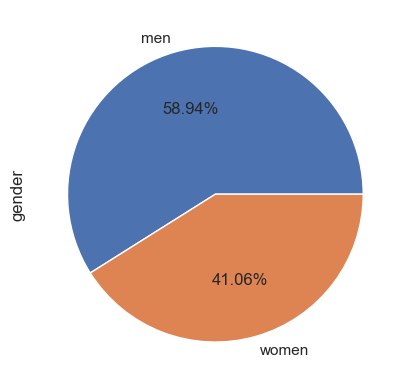

In [12]:
sns.set(font_scale=1)
df['gender'].value_counts().plot.pie(autopct='%.2f%%')
sns.set(font_scale=1)

In [13]:
df['Rating'] = df['Rating'].astype(float)
ratings = df['Rating'].value_counts().head(14)
df = df[df['Rating'].isin(ratings.index)]

<Axes: xlabel='Rating', ylabel='count'>

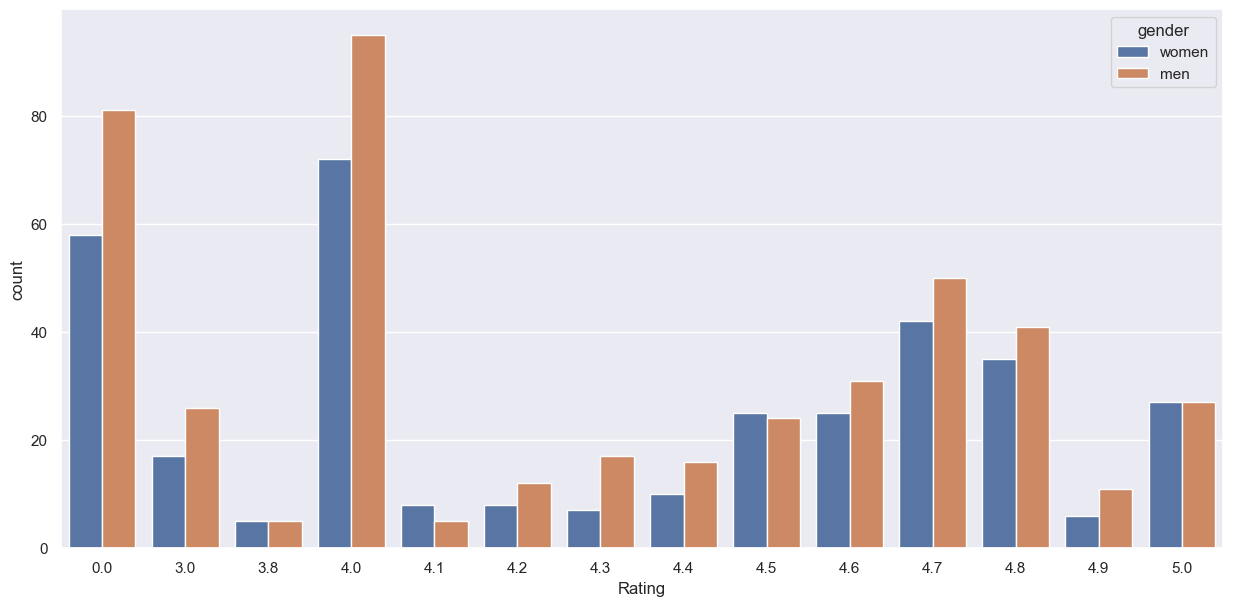

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x="Rating",hue='gender',data=df)

In [15]:
# gender and rating are equally distributed

<Axes: xlabel='Rating', ylabel='count'>

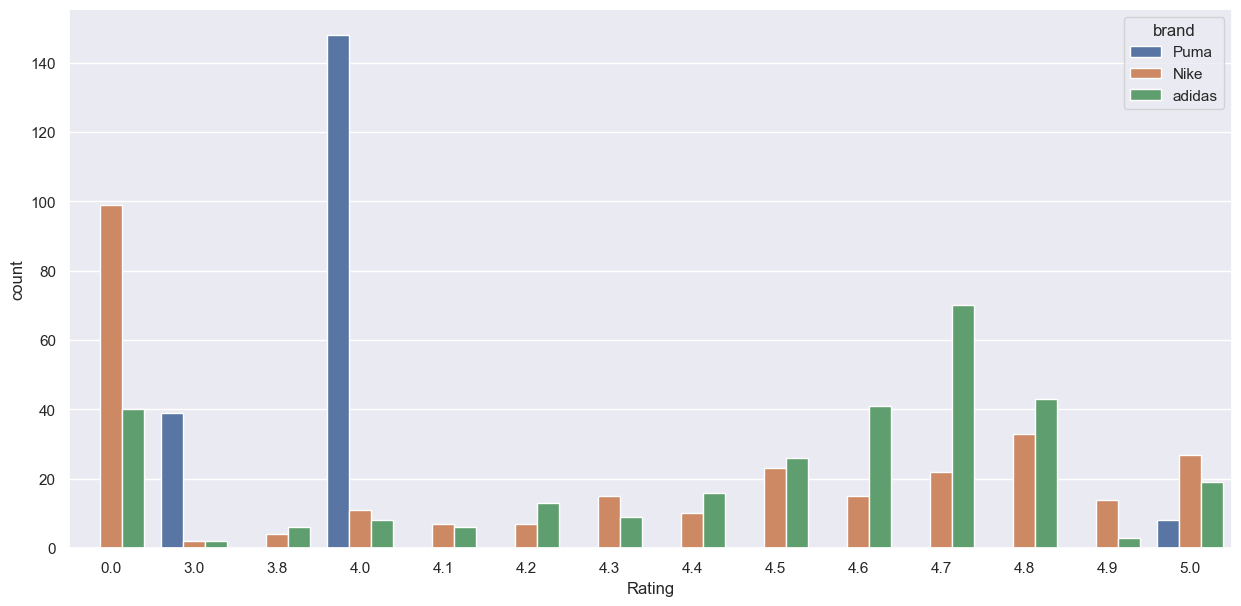

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(x="Rating",hue='brand',data=df)

In [17]:
# puma rating is present only for 3,4,5

<Axes: xlabel='Rating', ylabel='count'>

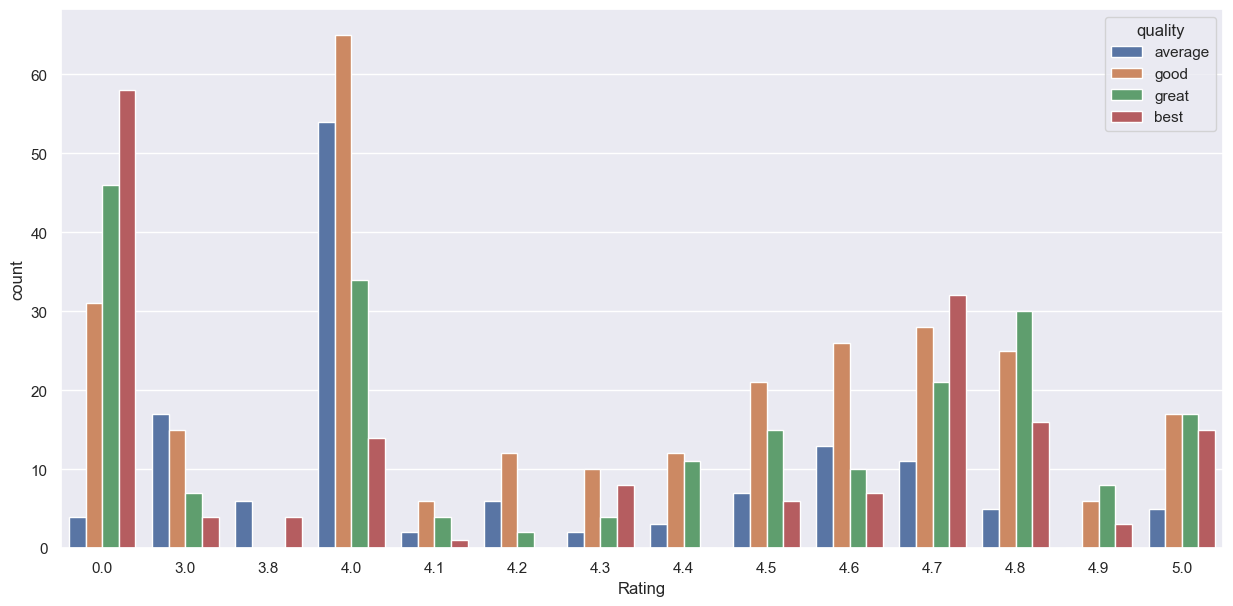

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(x="Rating",hue='quality',data=df)

<Axes: xlabel='Rating', ylabel='count'>

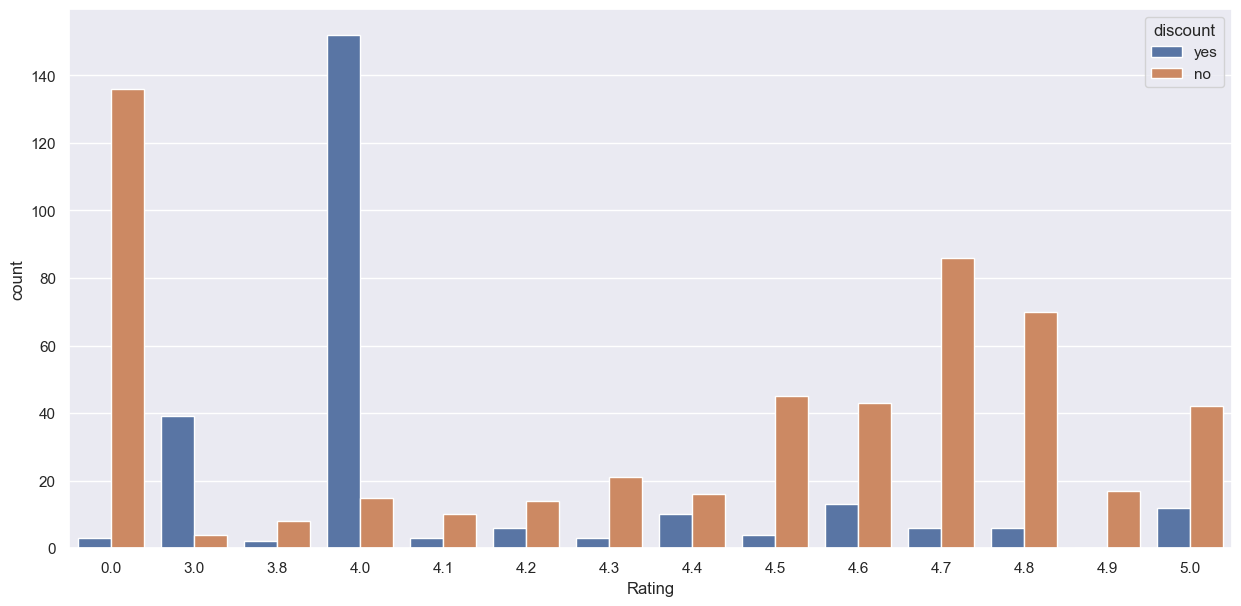

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x="Rating",hue='discount',data=df)

In [20]:
# highest rating is for 4 and highest discount is given

<Axes: xlabel='type', ylabel='count'>

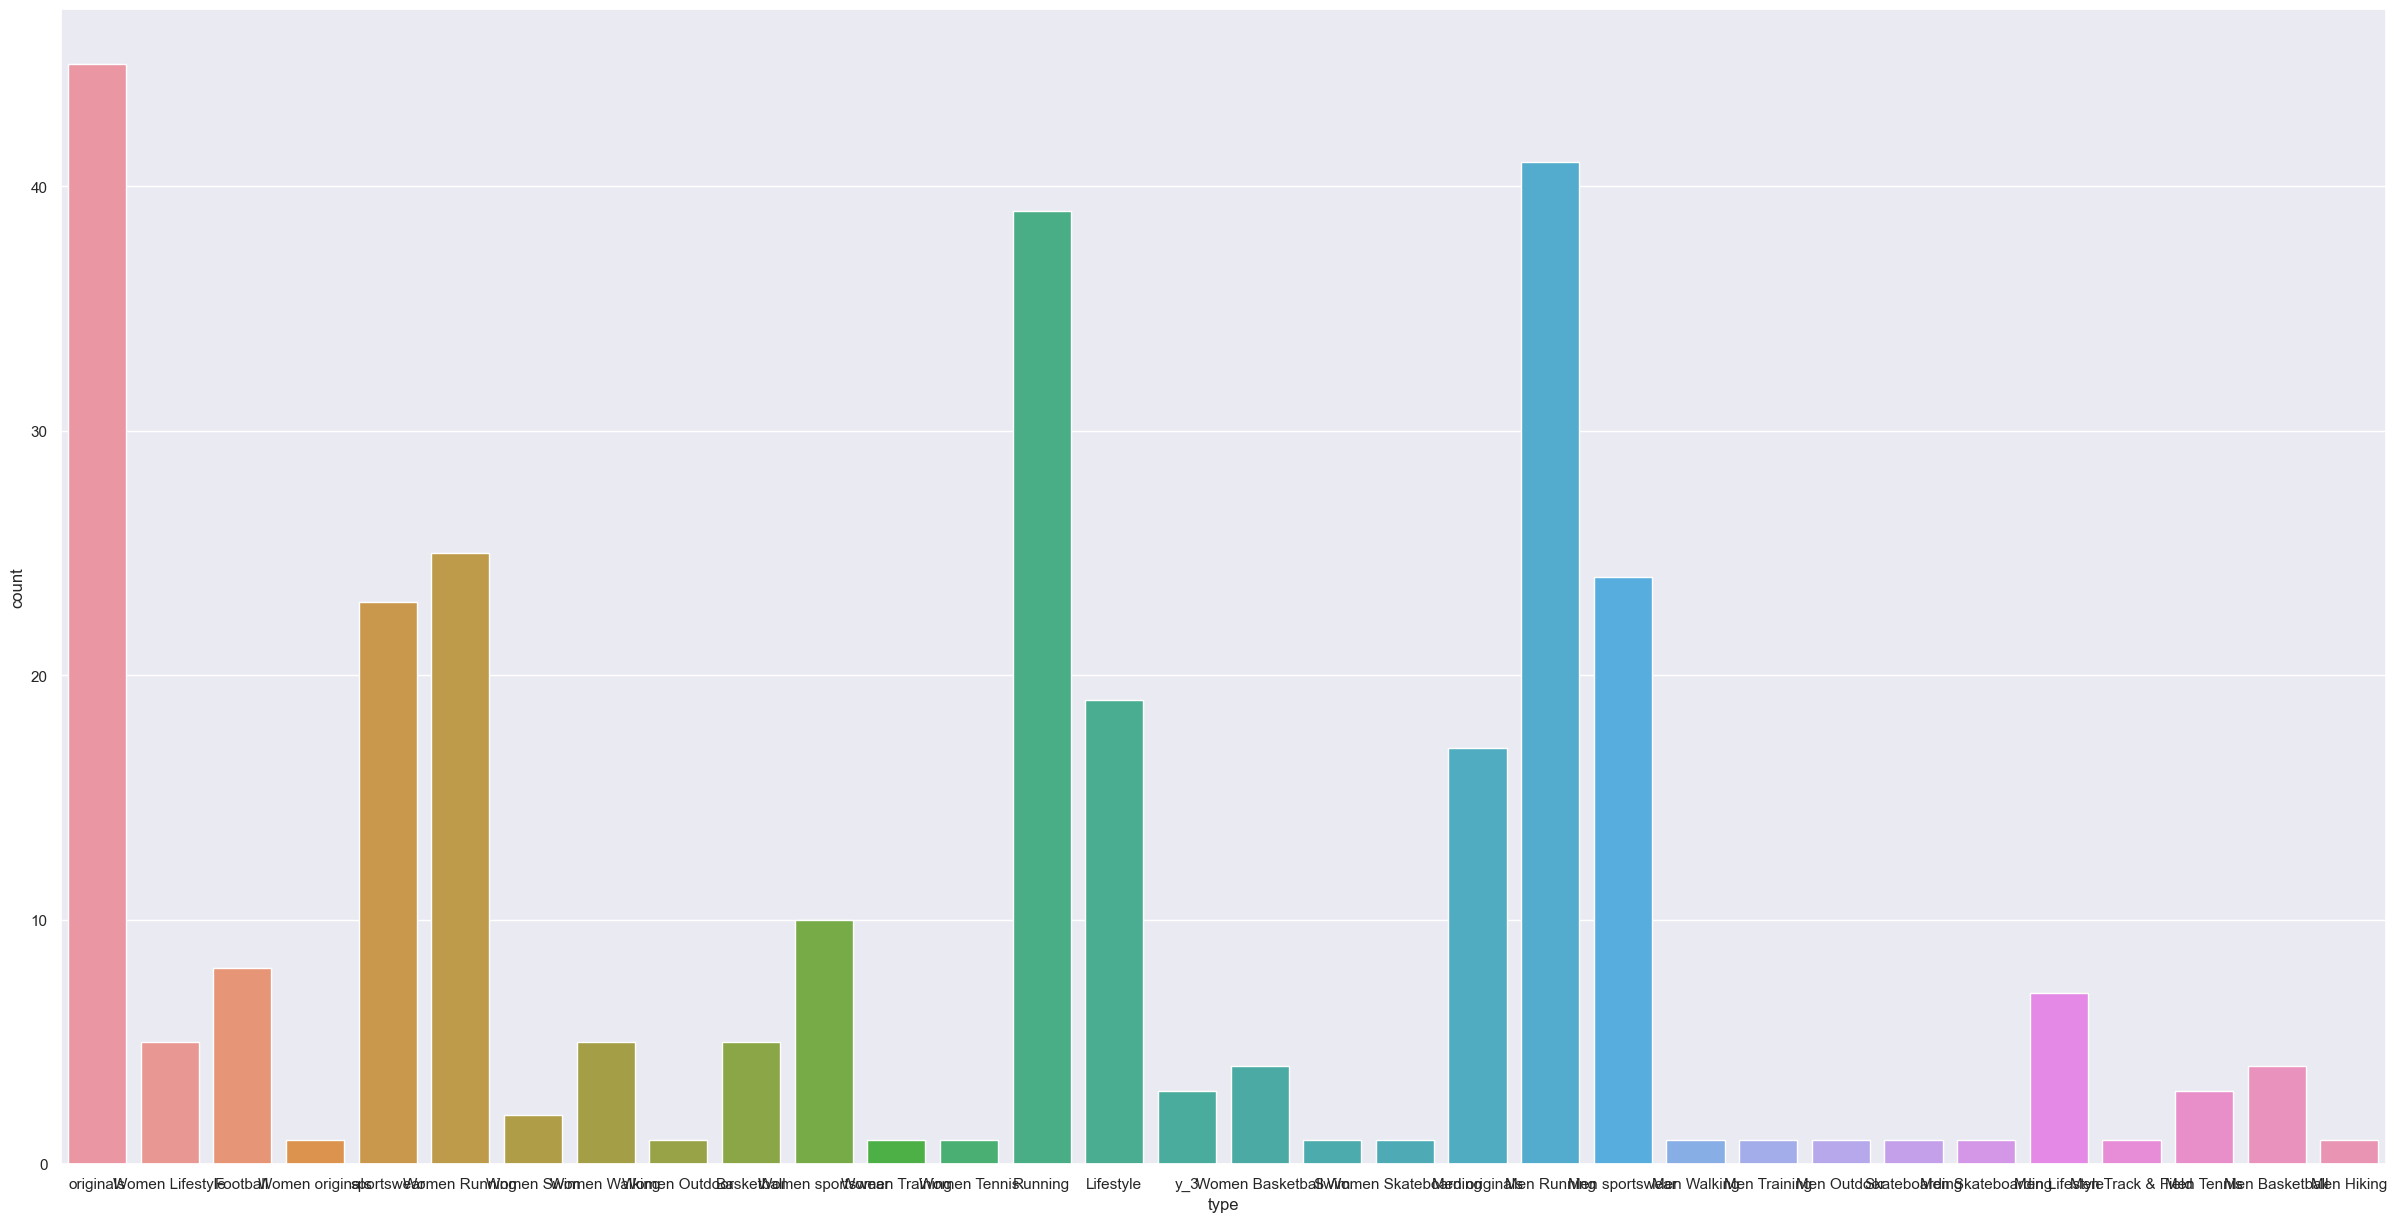

In [21]:
sns.set(font_scale=1)
plt.figure(figsize=(30,15))
sns.countplot(x="type",data=df)

In [22]:
df.columns

Index(['Name', 'Number_of_colour', 'Product_Code', 'Reviews', 'Rating',
       'gender', 'brand', 'colour1', 'colour2', 'colour3', 'colour4',
       'selling_price', 'quality', 'type', 'all_sizes', 'size_count',
       'discount', 'Types1', 'Types2', 'colors_count'],
      dtype='object')

In [23]:
df=df.drop(['Name', 'Number_of_colour', 'Product_Code', 'Reviews', 'colour1', 'colour2', 'colour3', 'colour4', 'type', 'all_sizes', 'size_count', 'colors_count'],axis=1)

In [24]:
df=df.dropna()

In [25]:
df['quality'].value_counts()

good       274
great      209
best       163
average    135
Name: quality, dtype: int64

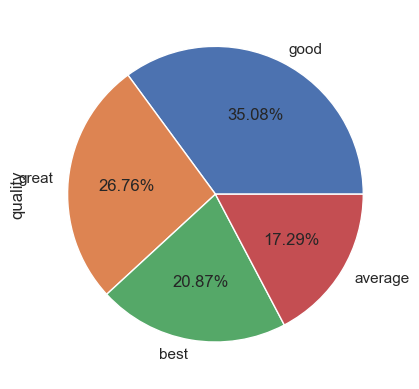

In [26]:
sns.set(font_scale=1)
df['quality'].value_counts().plot.pie(autopct='%.2f%%')
sns.set(font_scale=1)

In [27]:
qual = {'good':1,'great':2,'best':3,}

def types(type):
    if type in qual.keys():
        return qual[type]
    else:
        return 0
    
df['quality'] = df['quality'].apply(types)

In [28]:
df['discount'] = pd.factorize(df['discount'])[0]

In [29]:
df['brand'].value_counts()

adidas    297
Nike      289
Puma      195
Name: brand, dtype: int64

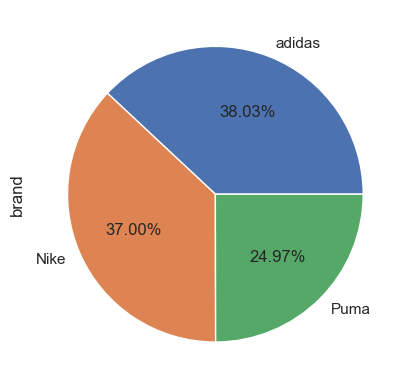

In [30]:
sns.set(font_scale=1)
df['brand'].value_counts().plot.pie(autopct='%.2f%%')
sns.set(font_scale=1)

In [31]:
df['brand'] = pd.factorize(df['brand'])[0]
df['gender'] = pd.factorize(df['gender'])[0]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 1229
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rating         781 non-null    float64
 1   gender         781 non-null    int64  
 2   brand          781 non-null    int64  
 3   selling_price  781 non-null    float64
 4   quality        781 non-null    int64  
 5   discount       781 non-null    int64  
 6   Types1         781 non-null    int64  
 7   Types2         781 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.9 KB


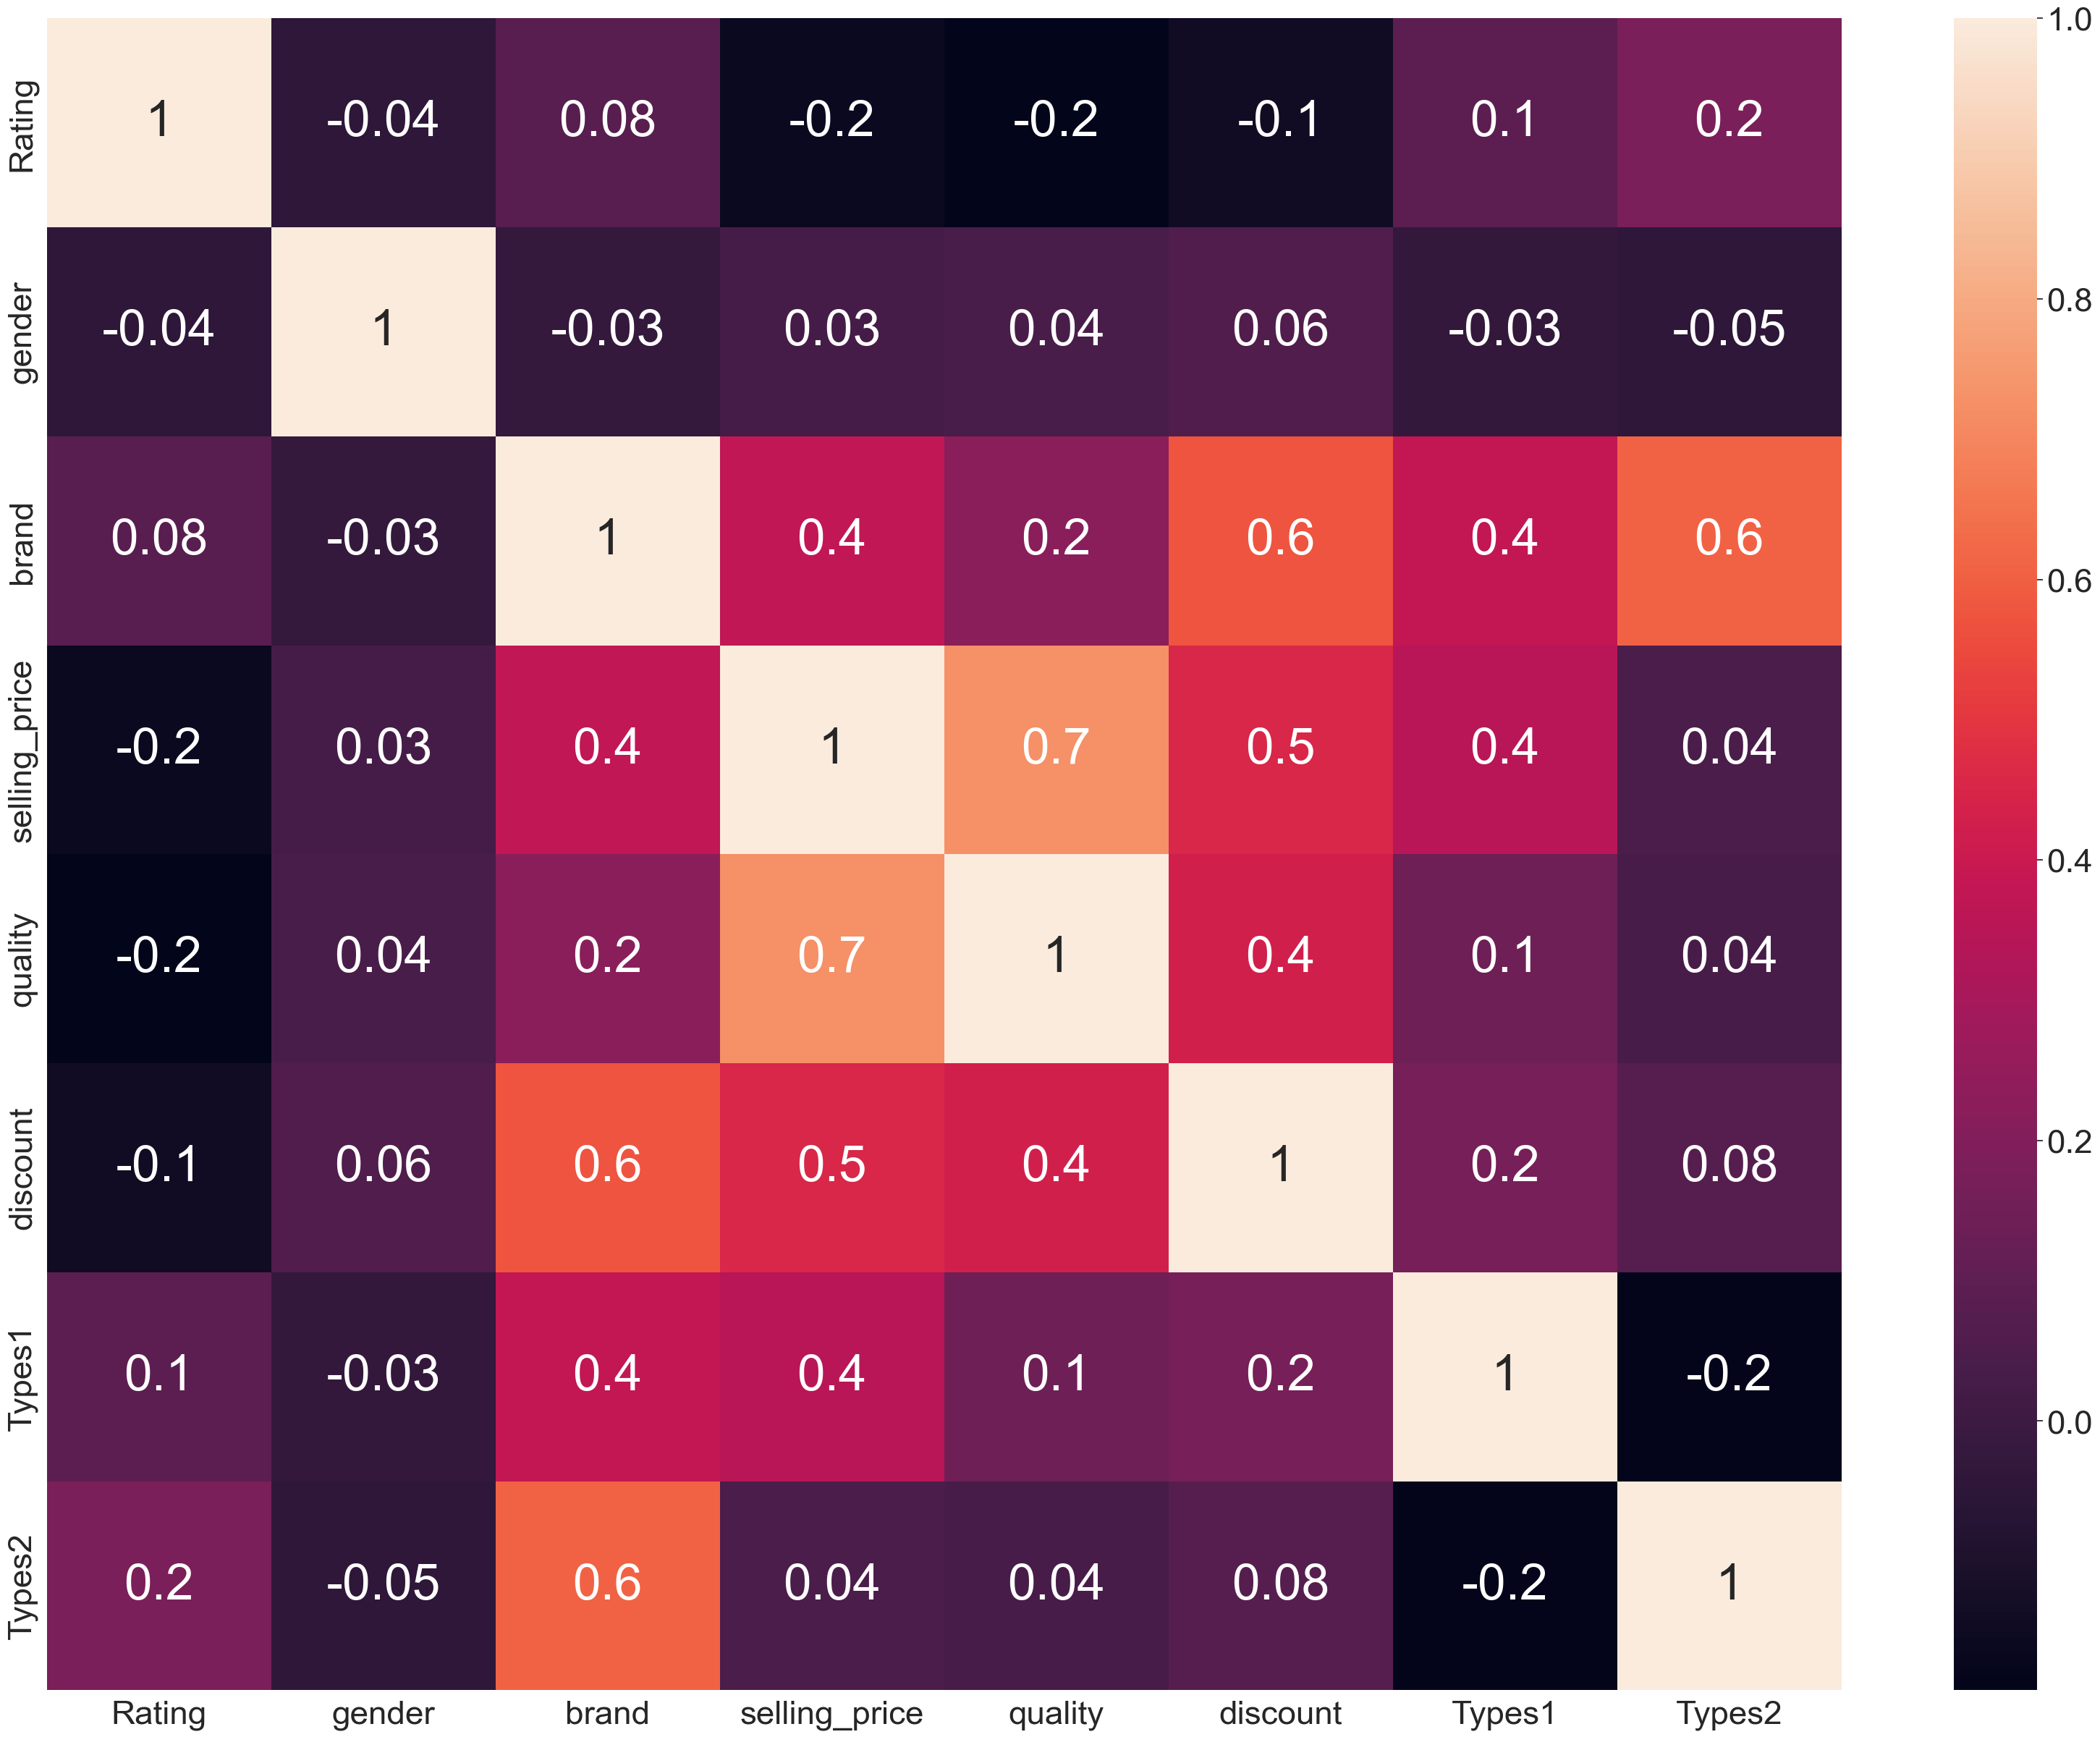

In [33]:
sns.set(font_scale=3)
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':50})
sns.set(font_scale=3)

In [34]:
df= df.drop(['Types2','Types1'],axis=1)

In [35]:
df= df.drop('selling_price',axis=1)

In [36]:
df.describe()

,Rating,gender,brand,quality,discount
count,781.000000,781.000000,781.000000,781.000000,781.000000
mean,3.608835,0.564661,1.130602,1.512164,0.668374
std,1.705590,0.496119,0.783384,1.007112,0.471099
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000,1.000000,0.000000
50%,4.300000,1.000000,1.000000,1.000000,1.000000
75%,4.700000,1.000000,2.000000,2.000000,1.000000
max,5.000000,1.000000,2.000000,3.000000,1.000000


<Axes: >

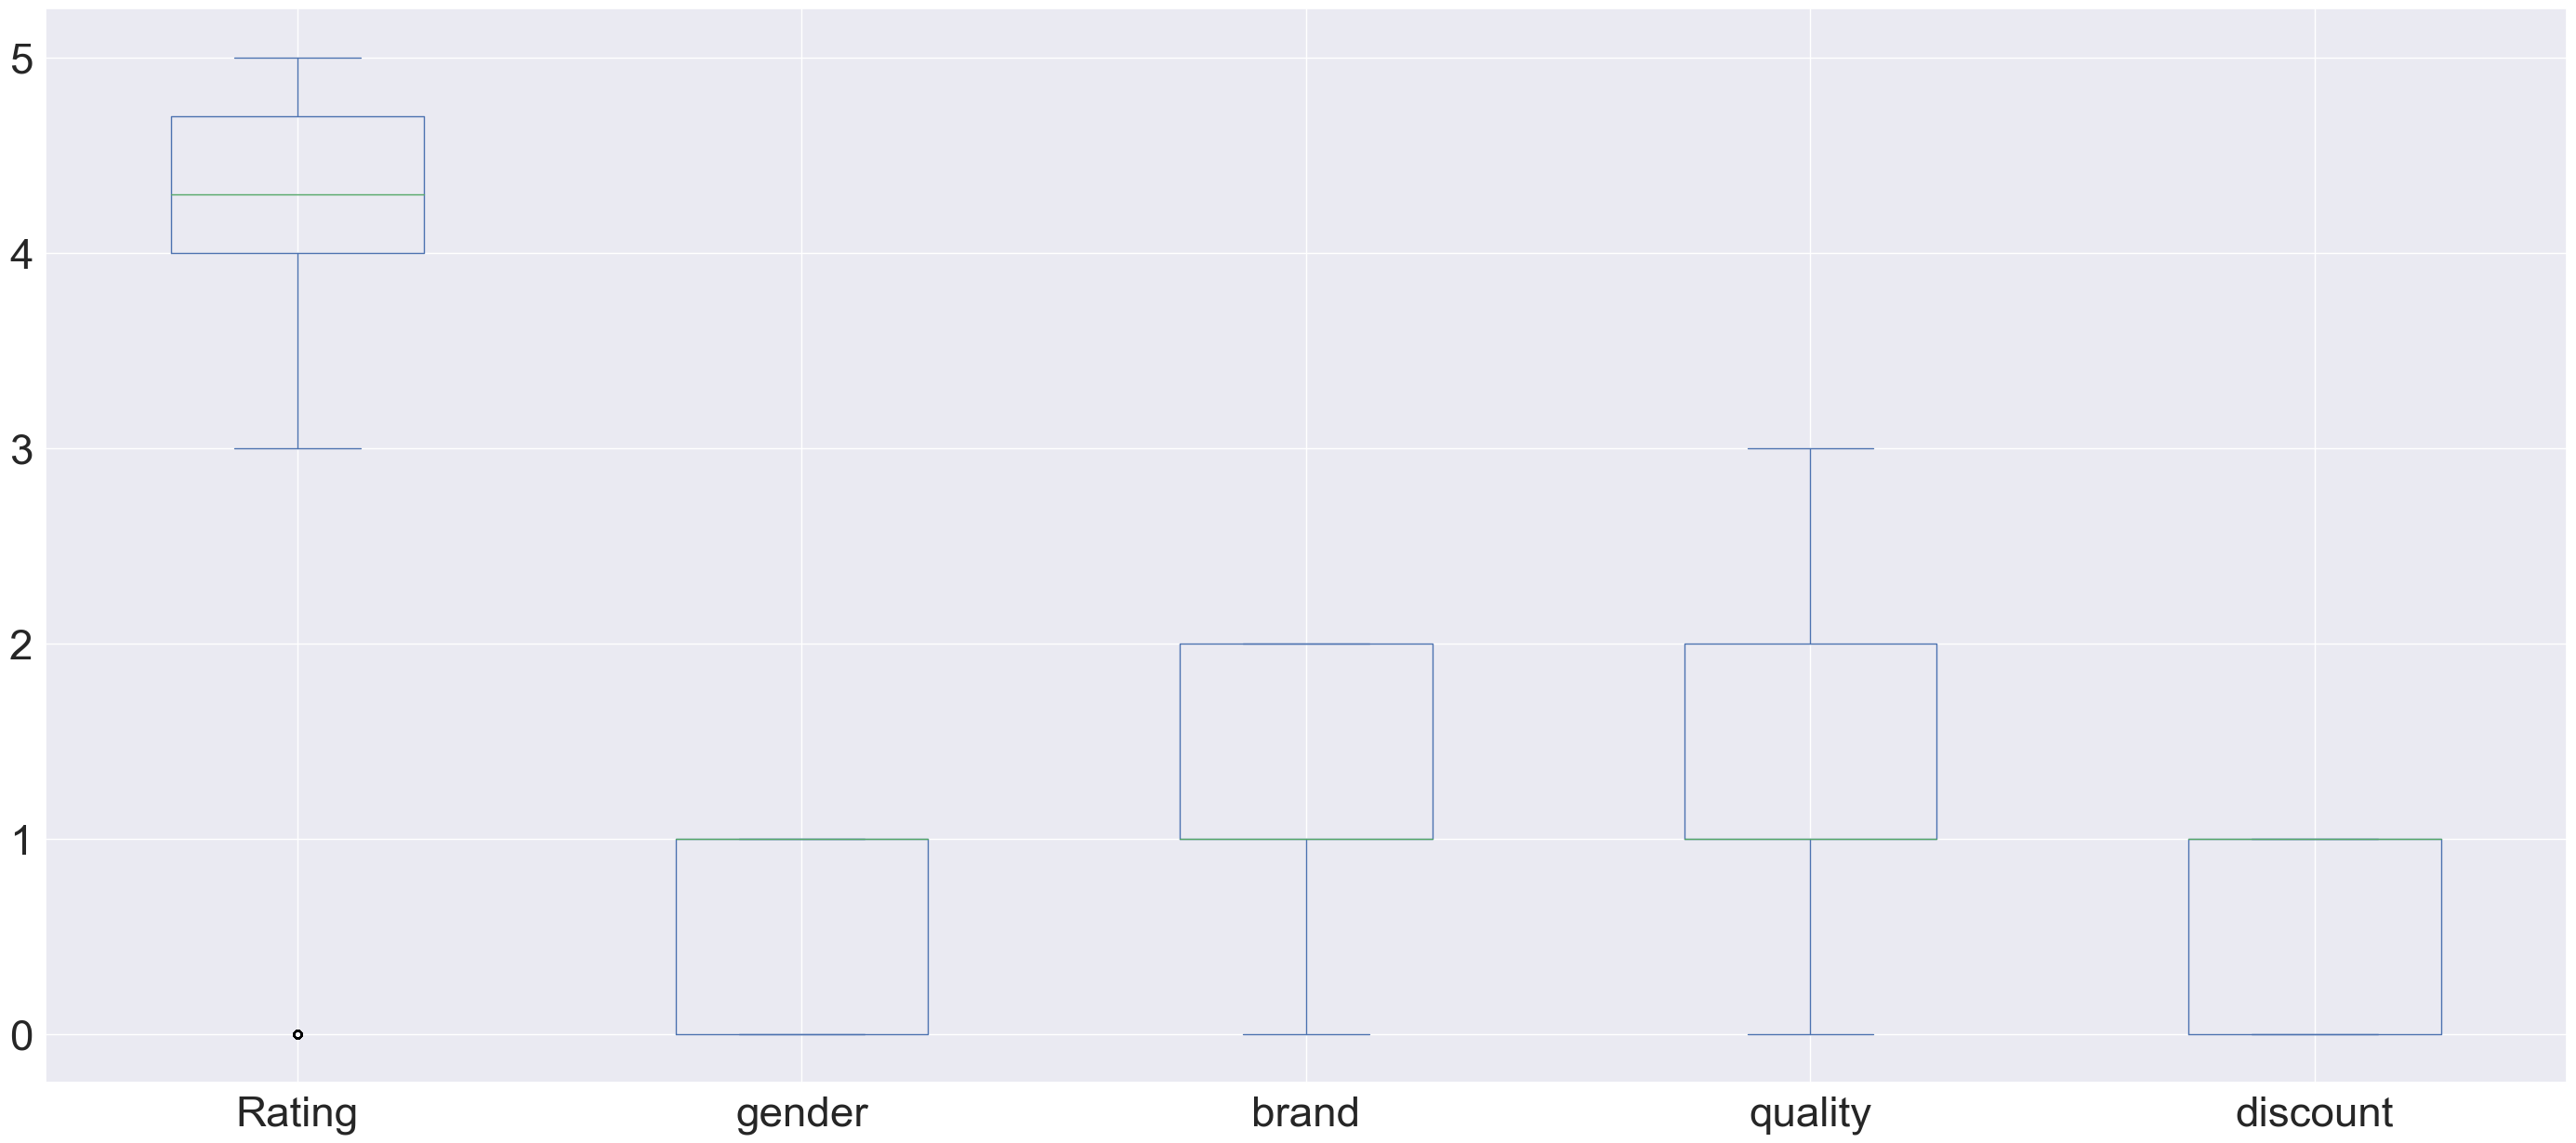

In [37]:
df.plot(kind='box',figsize=(35,15))

In [38]:
df.skew()

Rating     -1.490108
gender     -0.261335
brand      -0.233374
quality     0.072357
discount   -0.716648
dtype: float64

In [39]:
from pandas.core.arrays import boolean
df['Rating'] = df['Rating'].astype(bool)

In [40]:
x=df.drop('Rating',axis=1)
y=df['Rating']

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier , VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [43]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testing : ',lr.score(x_test_sca,y_test))

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

Training  :  0.8296703296703297
Testing :  0.825531914893617
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        41
        True       0.83      1.00      0.90       194

    accuracy                           0.83       235
   macro avg       0.41      0.50      0.45       235
weighted avg       0.68      0.83      0.75       235

[0.81818182 0.83076923 0.83076923 0.83076923 0.66153846 0.76923077
 0.78461538 0.83076923 0.83076923 0.83076923 0.83076923 0.81538462]
0.8053613053613055
difference 0.020170609532311534


In [44]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testing : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

Training  :  0.8351648351648352
Testing :  0.8595744680851064
              precision    recall  f1-score   support

       False       0.67      0.39      0.49        41
        True       0.88      0.96      0.92       194

    accuracy                           0.86       235
   macro avg       0.77      0.67      0.71       235
weighted avg       0.84      0.86      0.84       235

[0.83018868 0.84615385 0.82692308 0.82692308 0.71153846 0.67307692
 0.61538462 0.78846154 0.80769231 0.96153846 0.88461538 0.82692308
 0.78846154 0.82692308 0.82692308]
0.8027818093855829
difference 0.056792658699523546


In [45]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print('Training  : ',gs.score(x_train_sca,y_train))
print('Testing : ',gs.score(x_test_sca,y_test))

print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

Training  :  0.6336996336996337
Testing :  0.6553191489361702
              precision    recall  f1-score   support

       False       0.31      0.83      0.46        41
        True       0.94      0.62      0.75       194

    accuracy                           0.66       235
   macro avg       0.63      0.72      0.60       235
weighted avg       0.83      0.66      0.70       235

[0.82802548 0.78846154 0.57051282 0.38461538 0.82692308]
0.6797076596439654
difference -0.02438851070779524


In [46]:
rfc= RandomForestClassifier(n_estimators=150)
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testing : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  0.8351648351648352
Testing :  0.8468085106382979
              precision    recall  f1-score   support

       False       0.67      0.24      0.36        41
        True       0.86      0.97      0.91       194

    accuracy                           0.85       235
   macro avg       0.76      0.61      0.64       235
weighted avg       0.83      0.85      0.82       235

[0.84848485 0.83076923 0.83076923 0.8        0.18461538 0.76923077
 0.78461538 0.90769231 0.87692308 0.83076923 0.83076923 0.81538462]
0.7758352758352759
difference 0.07097323480302198
[[ 10  31]
 [  5 189]]


In [47]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testing : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

Training  :  0.8296703296703297
Testing :  0.825531914893617
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        41
        True       0.83      1.00      0.90       194

    accuracy                           0.83       235
   macro avg       0.41      0.50      0.45       235
weighted avg       0.68      0.83      0.75       235

[0.83018868 0.84615385 0.82692308 0.82692308 0.82692308 0.67307692
 0.71153846 0.78846154 0.80769231 0.82692308 0.82692308 0.82692308
 0.82692308 0.82692308 0.82692308]
0.8066279632317367
difference 0.018903951661880303


In [48]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testing : ',gbcbest.score(x_test_sca,y_test))

print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

Training  :  0.8351648351648352
Testing :  0.8595744680851064
              precision    recall  f1-score   support

       False       0.67      0.39      0.49        41
        True       0.88      0.96      0.92       194

    accuracy                           0.86       235
   macro avg       0.77      0.67      0.71       235
weighted avg       0.84      0.86      0.84       235

[0.86792453 0.88461538 0.82692308 0.88461538 0.76923077 0.55769231
 0.71153846 0.78846154 0.80769231 0.92307692 0.88461538 0.82692308
 0.82692308 0.82692308 0.82692308]
0.814271891630382
difference 0.04530257645472435


In [49]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print('Training  : ',bc.score(x_train_sca,y_train))
print('Testing : ',bc.score(x_test_sca,y_test))

print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

Training  :  0.8351648351648352
Testing :  0.8468085106382979
              precision    recall  f1-score   support

       False       0.67      0.24      0.36        41
        True       0.86      0.97      0.91       194

    accuracy                           0.85       235
   macro avg       0.76      0.61      0.64       235
weighted avg       0.83      0.85      0.82       235

[0.83018868 0.88461538 0.82692308 0.82692308 0.76923077 0.55769231
 0.71153846 0.78846154 0.80769231 0.92307692 0.88461538 0.82692308
 0.82692308 0.82692308 0.82692308]
0.807910014513788
difference 0.03889849612450991


In [50]:
dtc= DecisionTreeClassifier(min_samples_split= 24, max_features= 8, max_depth= 5, criterion= 'gini')
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testing : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y,cv=20)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

Training  :  0.8351648351648352
Testing :  0.8595744680851064
              precision    recall  f1-score   support

       False       0.67      0.39      0.49        41
        True       0.88      0.96      0.92       194

    accuracy                           0.86       235
   macro avg       0.77      0.67      0.71       235
weighted avg       0.84      0.86      0.84       235

[0.875      0.87179487 0.8974359  0.84615385 0.8974359  0.8974359
 0.53846154 0.82051282 0.64102564 0.82051282 0.76923077 0.82051282
 0.8974359  0.92307692 0.87179487 0.82051282 0.82051282 0.82051282
 0.82051282 0.82051282]
0.8245192307692308
difference 0.035055237315875565


In [51]:
dtc_param = {'max_depth':[5,10,15,20],
            'max_features':[5,7,8,'auto'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,8,16,24]
            }
clf = GridSearchCV(dtc, dtc_param,cv=5)
clf.fit(x_train_sca,y_train)

print(clf.best_score_)
print(clf.best_params_)

0.8315262718932445
{'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_split': 4}


In [52]:
classifier = [('RandomForestClassifier',rfc),('LogisticRegression',lr),('DecisionTreeClassifier',dtc)]
vc= VotingClassifier(estimators=classifier)
vc.fit(x_train_sca,y_train)
vcy_pred = vc.predict(x_test_sca)

print('Training  : ',vc.score(x_train_sca,y_train))
print('Testing : ',vc.score(x_test_sca,y_test))

print(classification_report(y_test,vcy_pred))

recheck = cross_val_score(vc,x,y,cv=20)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,vcy_pred) - recheck.mean())

Training  :  0.8351648351648352
Testing :  0.8595744680851064
              precision    recall  f1-score   support

       False       0.67      0.39      0.49        41
        True       0.88      0.96      0.92       194

    accuracy                           0.86       235
   macro avg       0.77      0.67      0.71       235
weighted avg       0.84      0.86      0.84       235

[0.875      0.87179487 0.8974359  0.84615385 0.8974359  0.8974359
 0.53846154 0.82051282 0.64102564 0.82051282 0.76923077 0.82051282
 0.8974359  0.92307692 0.87179487 0.82051282 0.82051282 0.82051282
 0.82051282 0.82051282]
0.8245192307692308
difference 0.035055237315875565


In [67]:
import joblib
joblib.dump(lr,'shoes_rating.obj')

['shoes_rating.obj']

.

.

.

In [22]:
df2 = pd.read_csv('shoesfinal.csv')
df2 = df2.drop(['Unnamed: 0','Rating','Types2'],axis=1)

In [23]:
df2 = df2.drop(['Name', 'Number_of_colour', 'Product_Code', 'Reviews','colour1', 'colour2', 'colour3', 'colour4', 'all_sizes', 'size_count'],axis=1)

In [26]:
df2.nunique()

gender             2
brand              4
selling_price    275
quality            4
type              34
discount           2
Types1             2
colors_count       4
dtype: int64

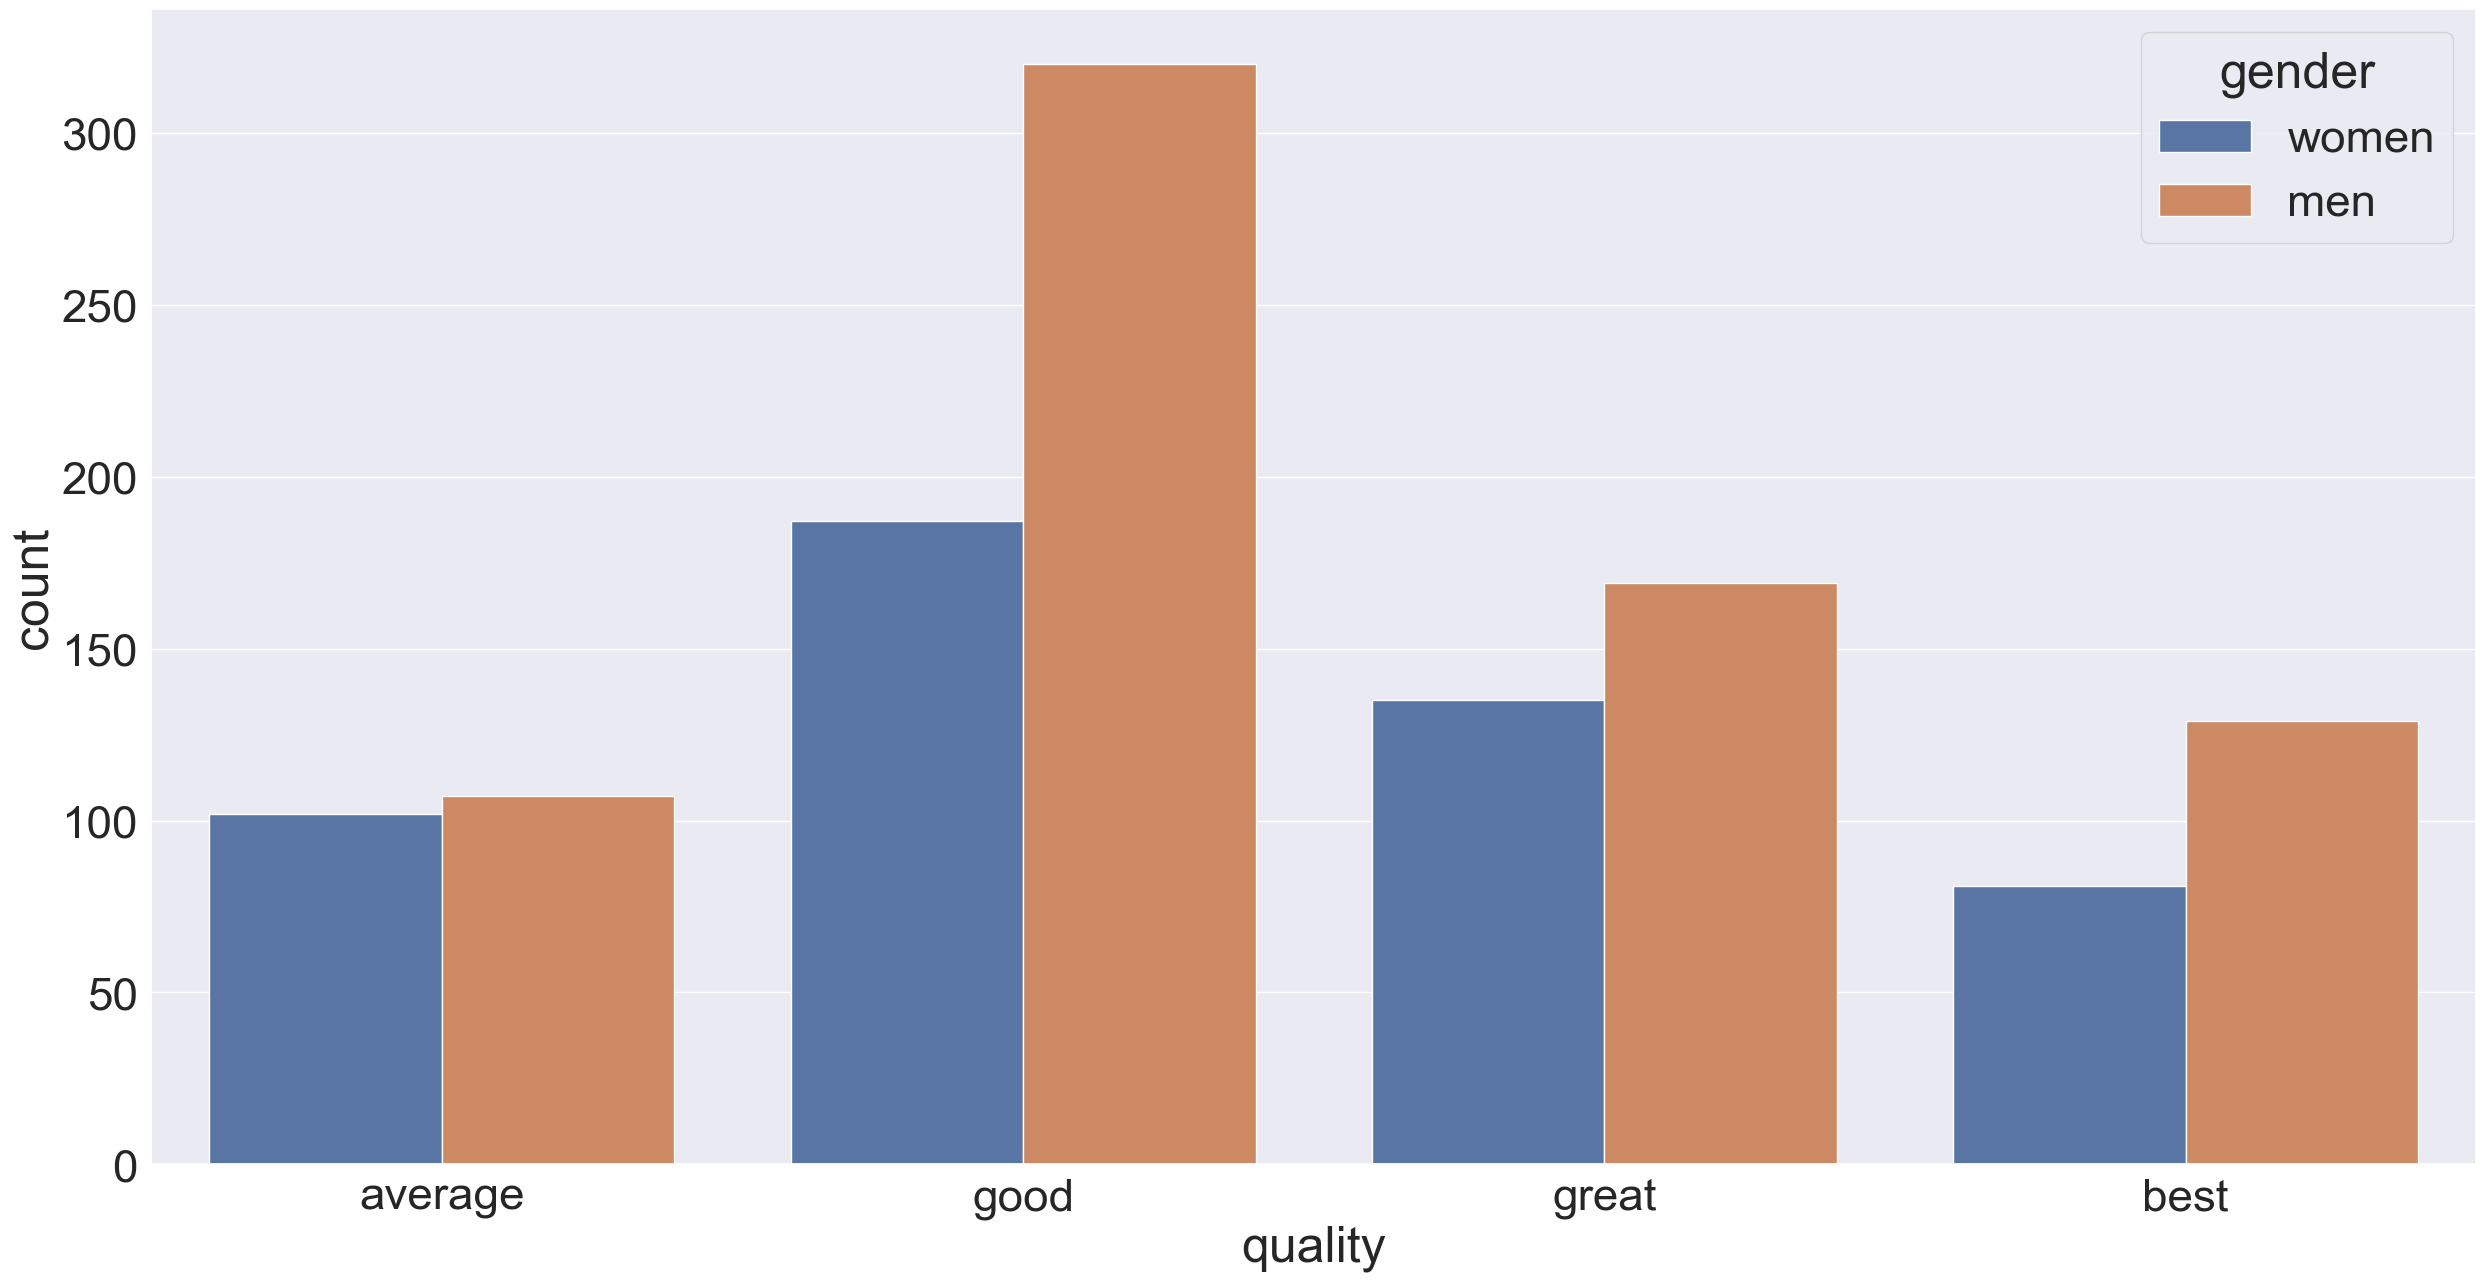

In [36]:
sns.set(font_scale=3)
plt.figure(figsize=(30,15))
sns.countplot(x="quality",hue='gender',data=df2)
sns.set(font_scale=3)

In [39]:
df2['brand'] = pd.factorize(df2['brand'])[0]
df2['gender'] = pd.factorize(df2['gender'])[0]
df2['discount'] = pd.factorize(df2['discount'])[0]

qual = {'good':1,'great':2,'best':3,}

def types(type):
    if type in qual.keys():
        return qual[type]
    else:
        return 0
    
df2['quality'] = df2['quality'].apply(types)

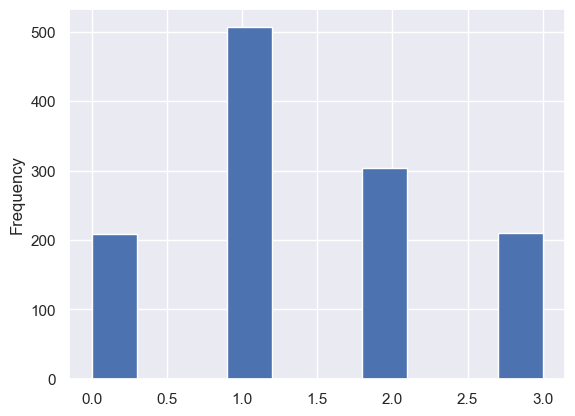

In [42]:
sns.set(font_scale=1)
df2['quality'].plot(kind='hist')
sns.set(font_scale=1)

In [49]:
df2 = df2.drop(['type','Types1'],axis=1)

In [50]:
df2.isnull().sum()

gender            0
brand             0
selling_price    17
quality           0
discount          0
colors_count      0
dtype: int64

In [51]:
df2 = df2.dropna()

In [52]:
df2

,gender,brand,selling_price,quality,discount,colors_count
0,0,0,2656.0,0,0,2
1,0,0,2905.0,0,0,2
2,0,0,3237.0,1,0,2
3,0,0,2490.0,0,0,2
4,0,0,2656.0,0,0,2
...,...,...,...,...,...,...
1225,1,3,7999.0,1,1,3
1226,1,3,11999.0,2,1,3
1227,1,3,7999.0,1,1,3
1228,1,3,18999.0,3,1,3


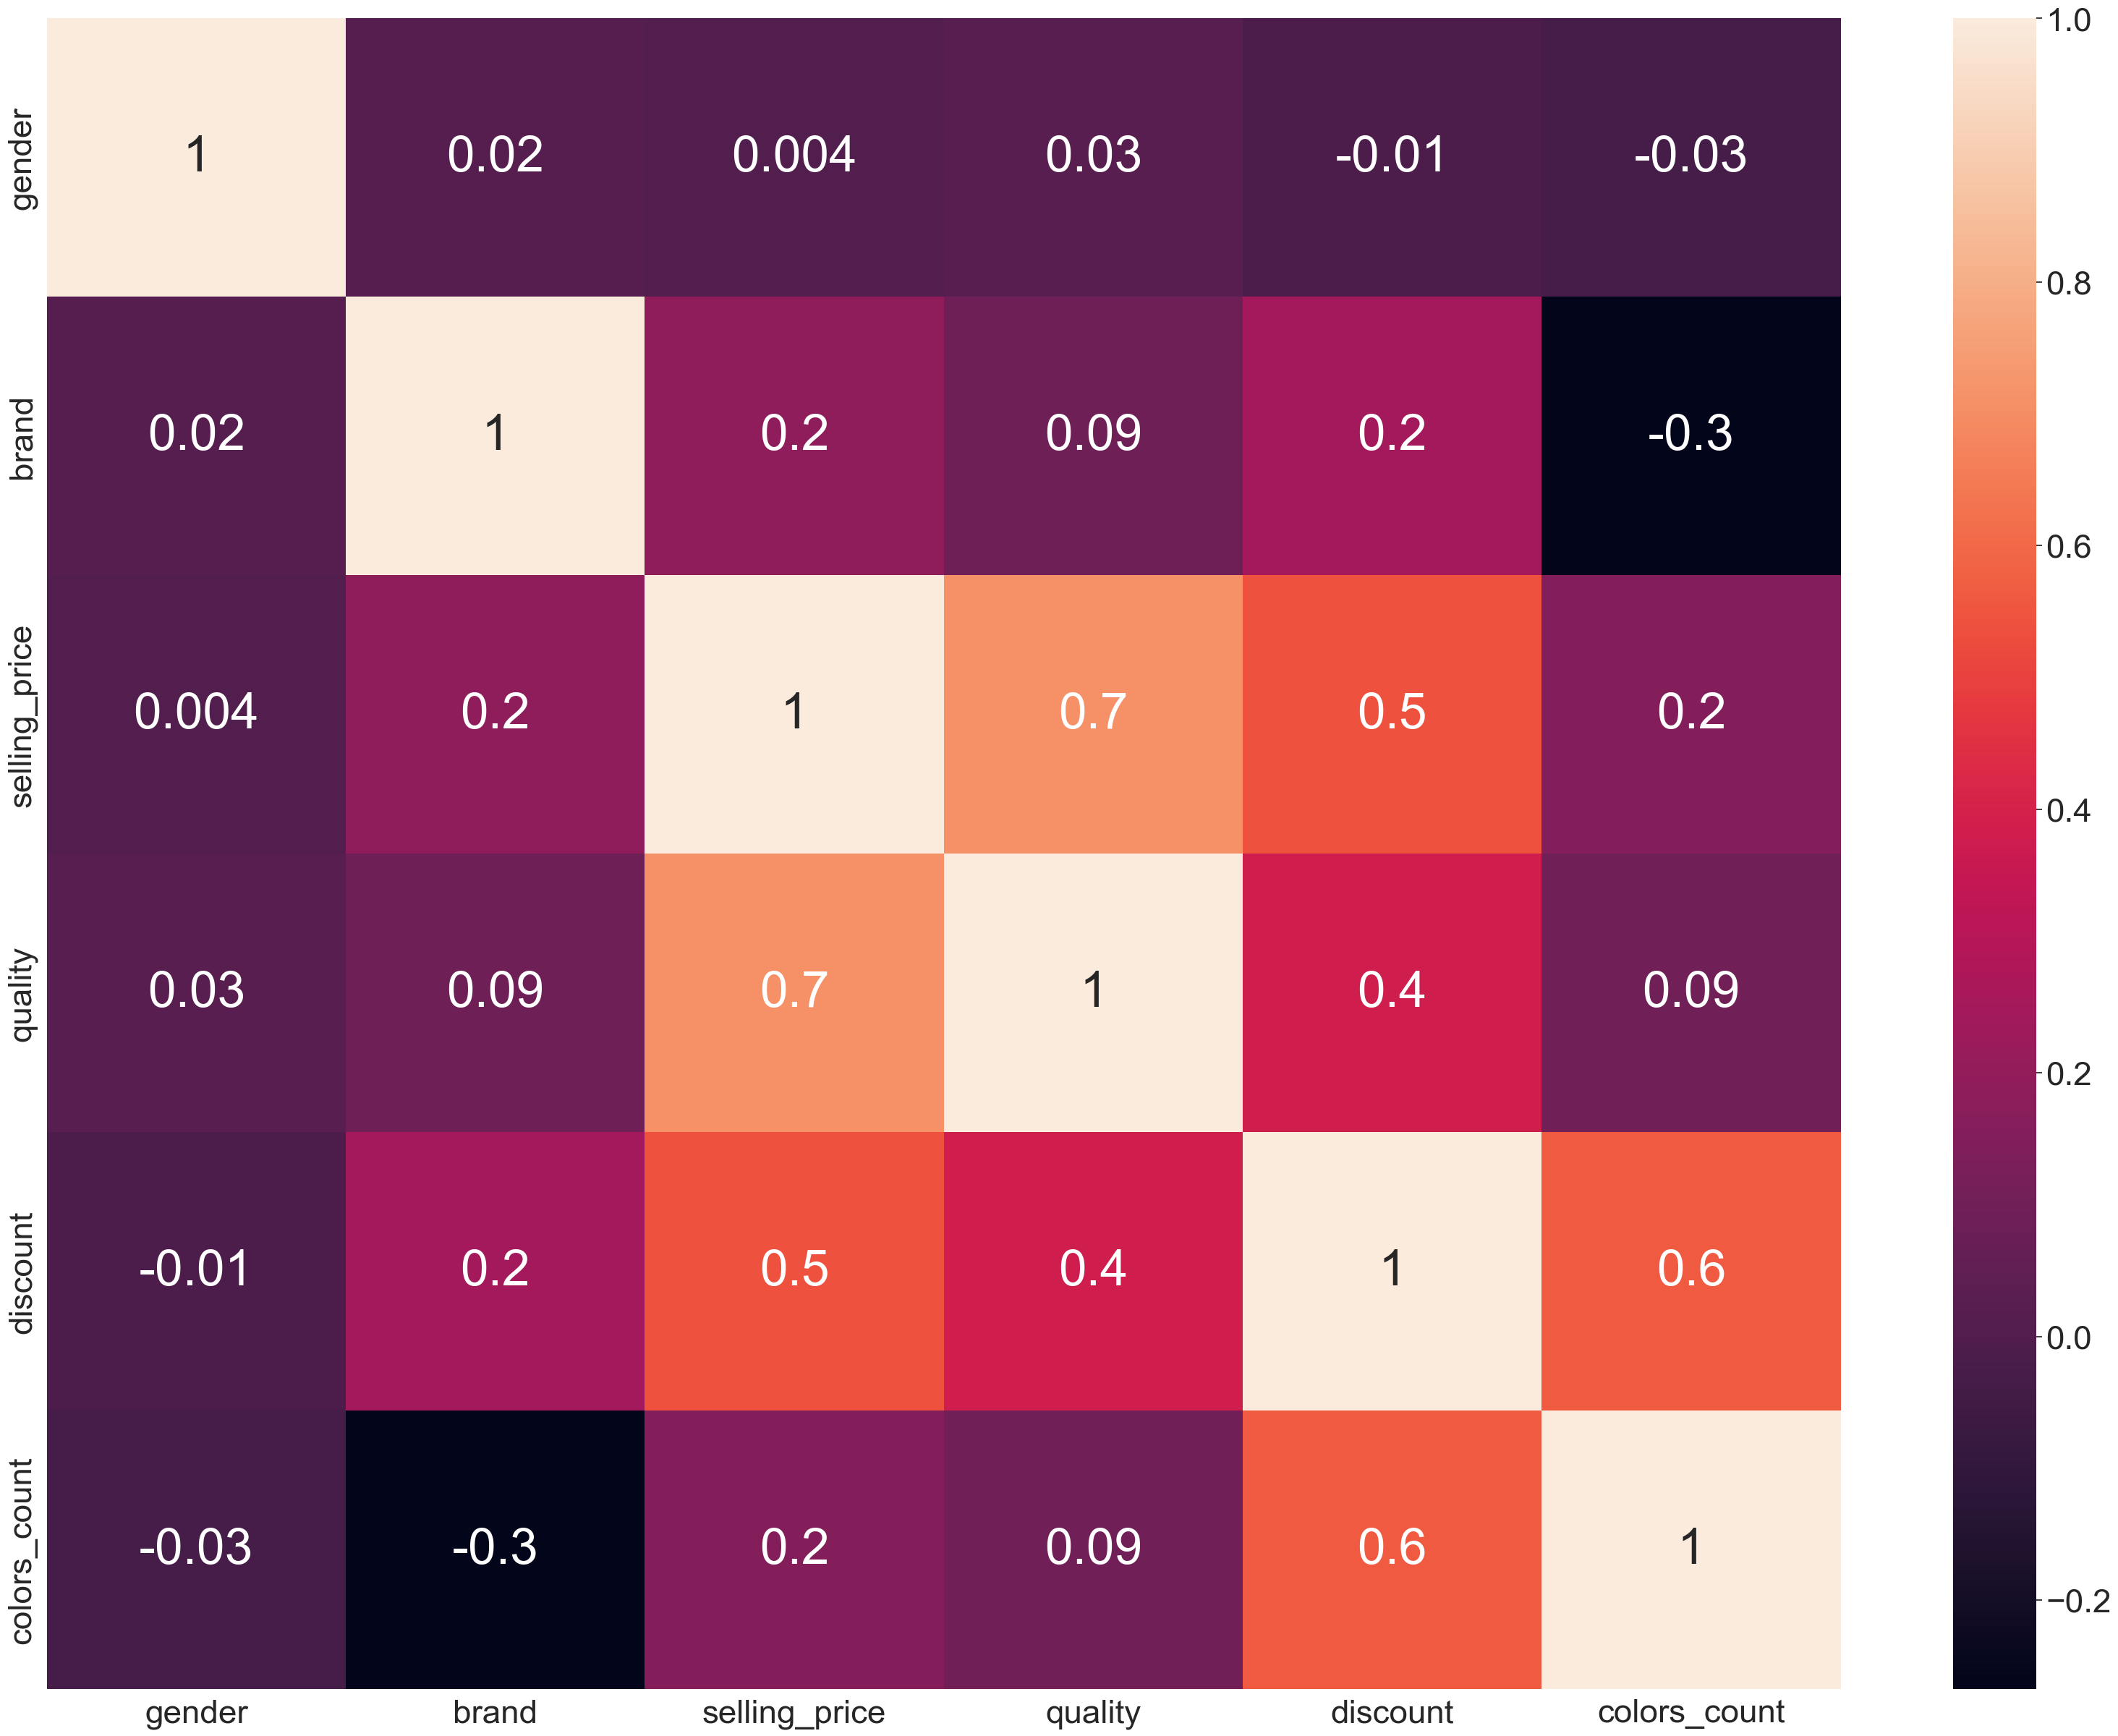

In [53]:
sns.set(font_scale=3)
plt.figure(figsize=(40,30))
sns.heatmap(df2.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':50})
sns.set(font_scale=3)

In [54]:
# gender doesn't give much help in predicting selling price

In [55]:
df2= df2.drop('gender',axis=1)

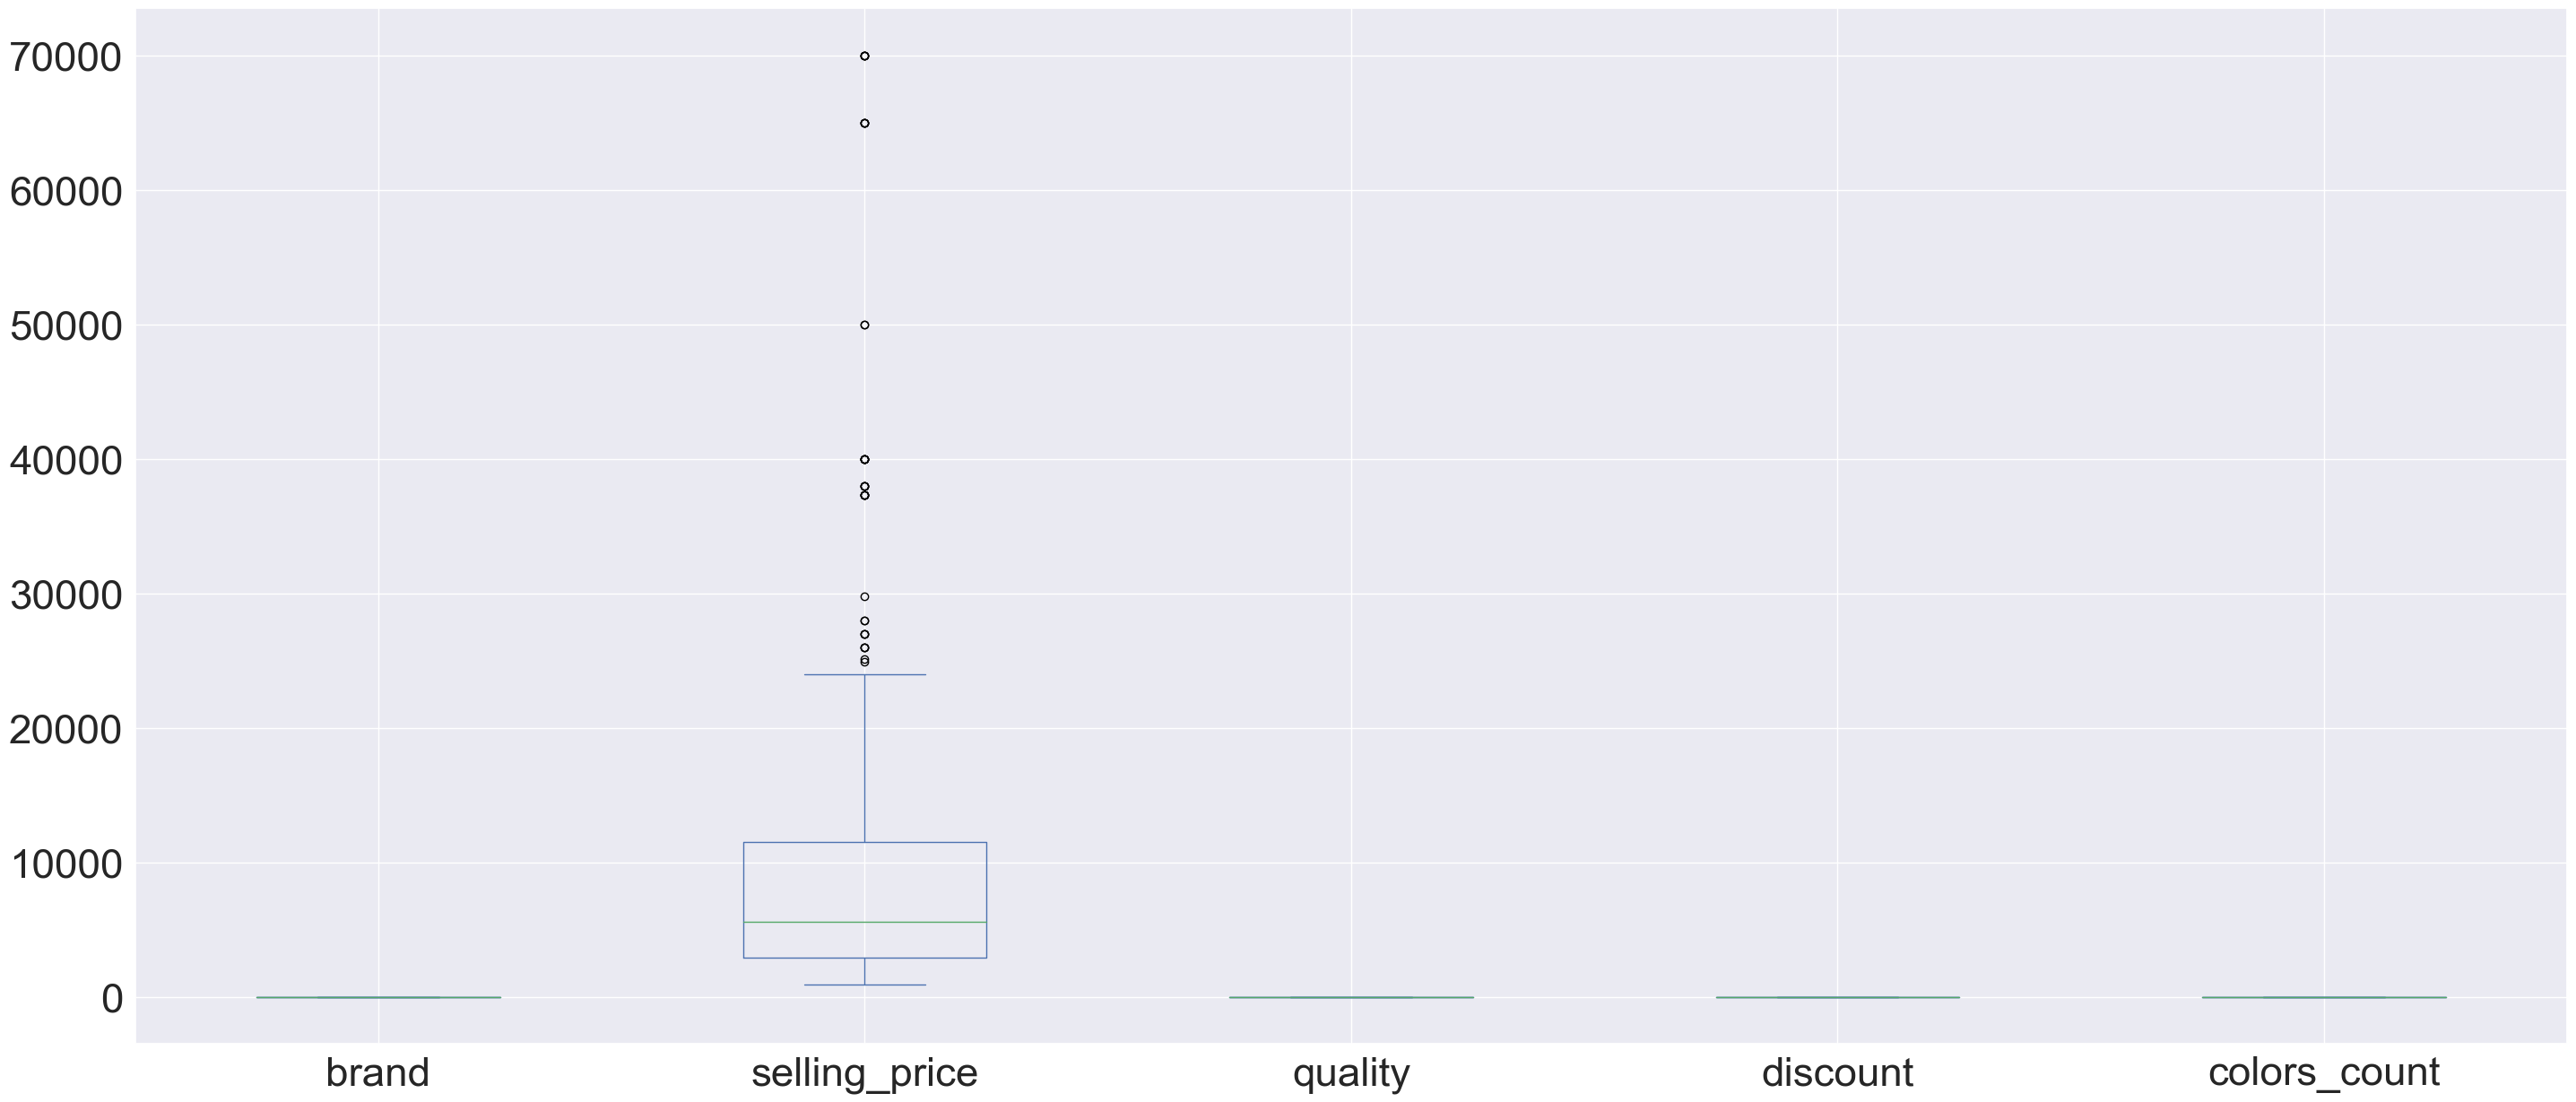

In [56]:
df2.plot(kind='box',figsize=(35,15))
sns.set(font_scale=3)

<Axes: >

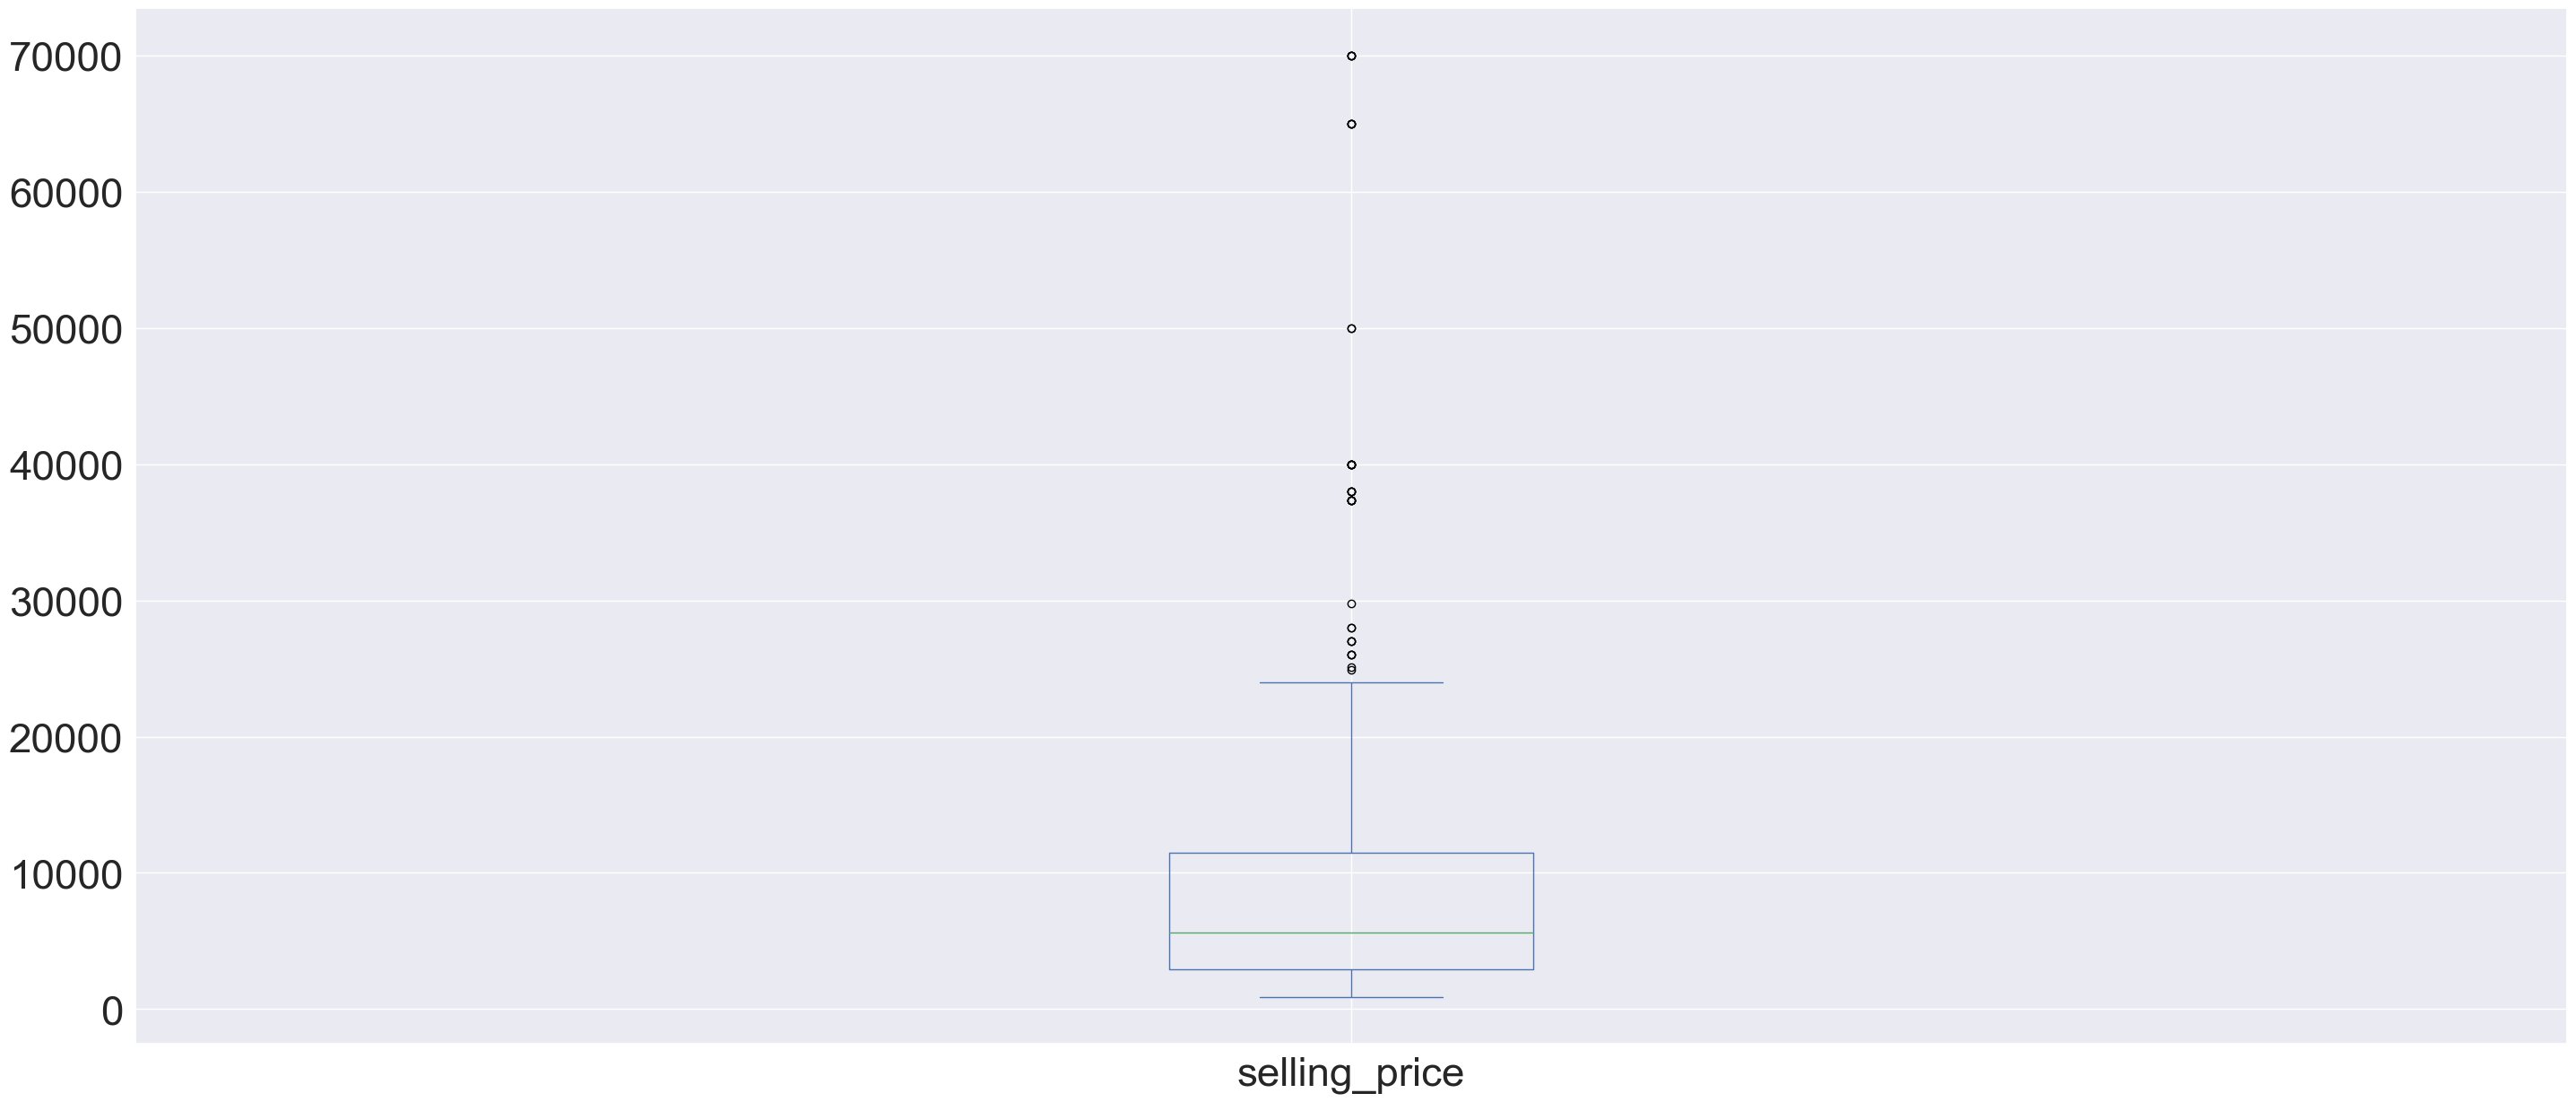

In [57]:
df2['selling_price'].plot(kind='box',figsize=(35,15))

In [58]:
df2.describe()

,brand,selling_price,quality,discount,colors_count
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,1.579555,8449.093982,1.396538,0.440231,2.203627
std,1.076900,8392.604973,0.950189,0.496620,1.085725
min,0.000000,897.000000,0.000000,0.000000,1.000000
25%,1.000000,2905.000000,1.000000,0.000000,1.000000
50%,2.000000,5599.000000,1.000000,0.000000,2.000000
75%,2.000000,11495.000000,2.000000,1.000000,3.000000
max,3.000000,69999.000000,3.000000,1.000000,4.000000


In [59]:
df2['selling_price'].describe()

count     1213.000000
mean      8449.093982
std       8392.604973
min        897.000000
25%       2905.000000
50%       5599.000000
75%      11495.000000
max      69999.000000
Name: selling_price, dtype: float64

In [60]:
df2[df2['selling_price']<15000]

,brand,selling_price,quality,discount,colors_count
0,0,2656.0,0,0,2
1,0,2905.0,0,0,2
2,0,3237.0,1,0,2
3,0,2490.0,0,0,2
4,0,2656.0,0,0,2
...,...,...,...,...,...
1222,3,6999.0,1,1,3
1225,3,7999.0,1,1,3
1226,3,11999.0,2,1,3
1227,3,7999.0,1,1,3


In [61]:
df2[df2['selling_price']<21000]

,brand,selling_price,quality,discount,colors_count
0,0,2656.0,0,0,2
1,0,2905.0,0,0,2
2,0,3237.0,1,0,2
3,0,2490.0,0,0,2
4,0,2656.0,0,0,2
...,...,...,...,...,...
1225,3,7999.0,1,1,3
1226,3,11999.0,2,1,3
1227,3,7999.0,1,1,3
1228,3,18999.0,3,1,3


In [62]:
# 100 values are between 15,000 and 21,000
# 62 values are between 21,000 and 70,000

In [63]:
df2 = df2[df2['selling_price']<15000]

.

In [64]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor , AdaBoostRegressor , BaggingRegressor , VotingRegressor

In [65]:
x = df2.drop('selling_price',axis=1)
y = df2['selling_price']

In [66]:
from sklearn.metrics import accuracy_score , confusion_matrix , mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

Training  :  0.9293077776109805
Testing :  0.9220973039147051
R2_score : 0.9220973039147051
[0.90286078 0.90937665 0.90967265 0.9094655  0.84277105 0.87436093
 0.852294   0.76392651 0.85140066 0.84170665 0.8140027  0.83015148
 0.83884828 0.8123758  0.71225608]
0.8443646492951842


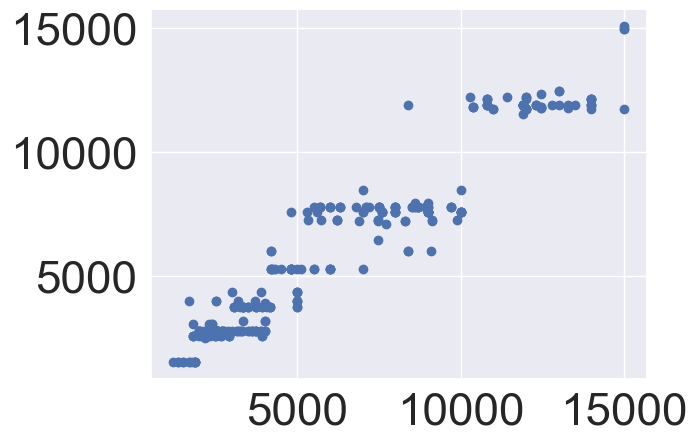

In [68]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_sca,y_train)
y_pred4= gbr.predict(x_test_sca)
gbr4 = metrics.r2_score(y_test,y_pred4)

print('Training  : ',gbr.score(x_train_sca,y_train))
print('Testing : ',gbr.score(x_test_sca,y_test))
print('R2_score :',gbr4)


recheck = cross_val_score(gbr,x,y,cv=15)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=y_pred4)

Training  :  0.8476046688743116
Testing :  0.8461031273378022
0.8461031273378022
[0.93037529 0.81013736 0.74549507]
0.828669240465154


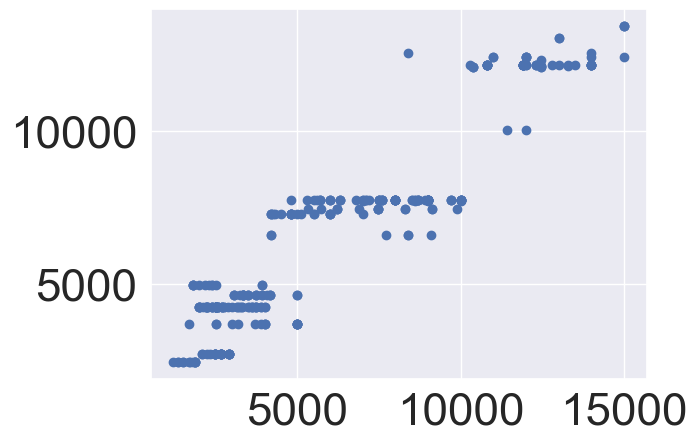

In [70]:
abr = AdaBoostRegressor()
abr.fit(x_train_sca,y_train)
abry_pred = abr.predict(x_test_sca)
abr1 = metrics.r2_score(y_test,abry_pred)

print('Training  : ',abr.score(x_train_sca,y_train))
print('Testing : ',abr.score(x_test_sca,y_test))
print(abr1)


recheck = cross_val_score(abr,x,y,cv=3)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=abry_pred)

Training  :  0.9304004989203558
Testing :  0.9217241733517215
[0.93958023 0.80794107 0.92395243 0.85833275 0.87304531 0.93477502
 0.80198559 0.85289173 0.85949038 0.88206003 0.81161193 0.77639661]
0.8601719230860474


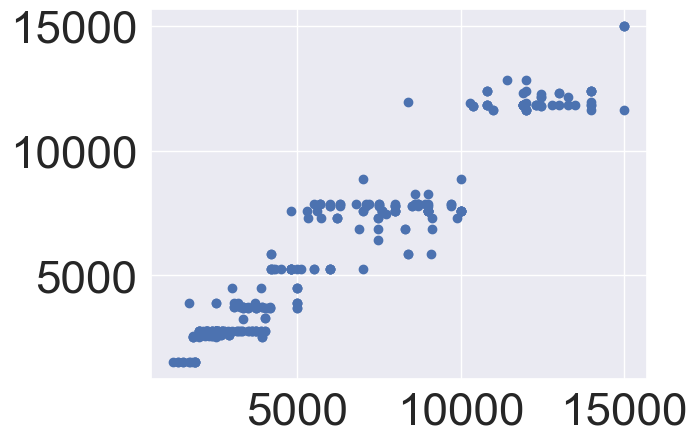

In [71]:
br = BaggingRegressor()
br.fit(x_train_sca,y_train)
bry_pred = br.predict(x_test_sca)
br1 = metrics.r2_score(y_test,bry_pred)

print('Training  : ',br.score(x_train_sca,y_train))
print('Testing : ',br.score(x_test_sca,y_test))

recheck = cross_val_score(br,x,y,cv=12)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=bry_pred)

Training  :  0.8327646669638258
Testing :  0.8382769493701796
[0.73411096 0.86000086 0.52697207]
0.7070279626815555


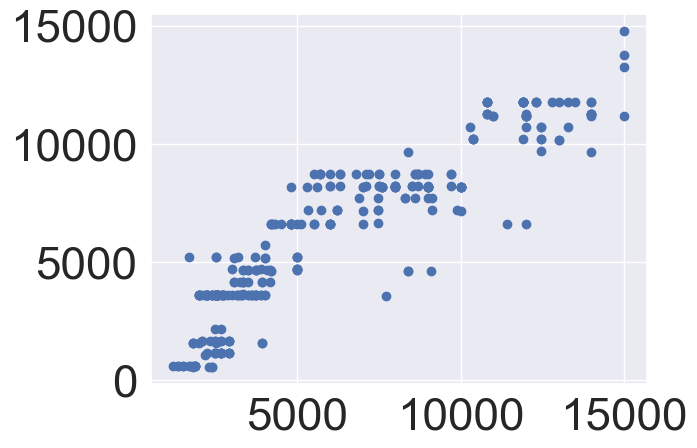

In [73]:
lr= LinearRegression()
lr.fit(x_train_sca,y_train)
y_pred2 = lr.predict(x_test_sca)
lr2 = metrics.r2_score(y_test,y_pred2)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testing : ',lr.score(x_test_sca,y_test))

recheck = cross_val_score(lr,x,y,cv=3)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=y_pred2)

In [74]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(x_train_sca,y_train)
lass = model.predict(x_test_sca)

print(model.coef_)
print(model.intercept_)
print(model.score(x_train_sca,y_train))
print(model.score(x_test_sca,y_test))

[ -26.09224394 2422.43056215 1702.49676959  548.8532627 ]
5950.3365122615805
0.8327646651173308
0.8382774234064004


Training  :  0.8936605351279642
Testing :  0.8989606720685309
[0.80606787 0.87240836 0.68319588 0.88382937 0.83557873 0.82289144
 0.84495068 0.82387394 0.78975022 0.91621576 0.65640577 0.73722541
 0.78818105 0.77544428 0.8069222  0.67058169 0.78896096 0.72040594
 0.82534368 0.60314597]
0.7825689585661874


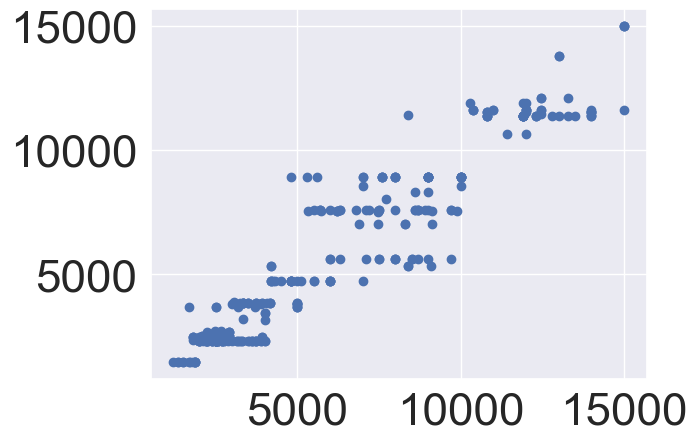

In [75]:
knr = KNeighborsRegressor()
knr.fit(x_train_sca,y_train)
knry_pred = knr.predict(x_test_sca)
knr1 = metrics.r2_score(y_test,knry_pred)

print('Training  : ',knr.score(x_train_sca,y_train))
print('Testing : ',knr.score(x_test_sca,y_test))

recheck = cross_val_score(knr,x,y,cv=20)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=knry_pred)

Training  :  0.9305987922019394
Testing :  0.9228478276032094
[0.90018606 0.90756375 0.90026129 0.91461065 0.84127705 0.87053971
 0.85243431 0.76631031 0.8454515  0.84200576 0.82959477 0.82084563
 0.80709724 0.81876357 0.72168859]
0.8425753462262338


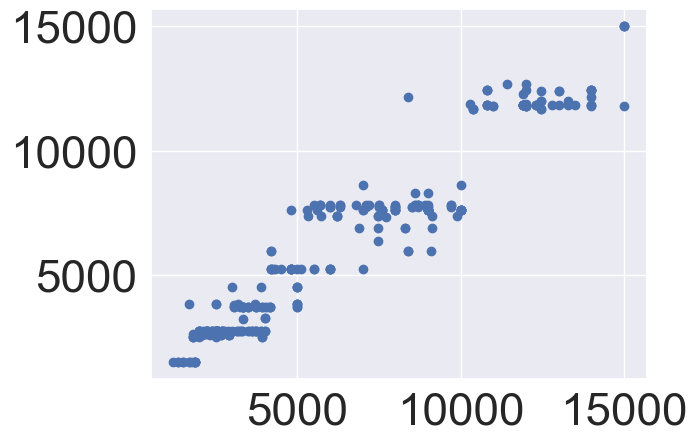

In [76]:
rfr= RandomForestRegressor()
rfr.fit(x_train_sca,y_train)
y_pred3 = rfr.predict(x_test_sca)
rfr3 = metrics.r2_score(y_test,y_pred3)

print('Training  : ',rfr.score(x_train_sca,y_train))
print('Testing : ',rfr.score(x_test_sca,y_test))

recheck = cross_val_score(rfr,x,y,cv=15)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=y_pred3)

Training  :  0.9309203939259211
Testing :  0.9222988448499594
0.9222988448499594
[0.93915358 0.81351098 0.92176837 0.85991308 0.87681985 0.93506518
 0.79787008 0.86178973 0.85519268 0.87580023 0.79064587 0.76820895]
0.8579782138890845


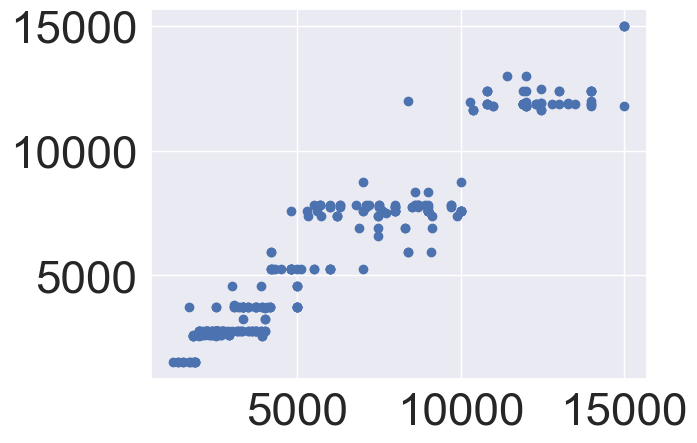

In [77]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_sca,y_train)
y_pred5= dtr.predict(x_test_sca)
dtr5 = metrics.r2_score(y_test,y_pred5)

print('Training  : ',dtr.score(x_train_sca,y_train))
print('Testing : ',dtr.score(x_test_sca,y_test))
print(dtr5)

recheck = cross_val_score(dtr,x,y,cv=12)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=y_pred5)

Training  :  0.9285030154122991
Testing :  0.9248388675614181
[0.88782914 0.91545601 0.87646585 0.91370786 0.83821016 0.86971744
 0.85690412 0.78840284 0.86115846 0.82960505 0.8112305  0.83652027
 0.8079655  0.81725245 0.69579997]
0.8404150413807924


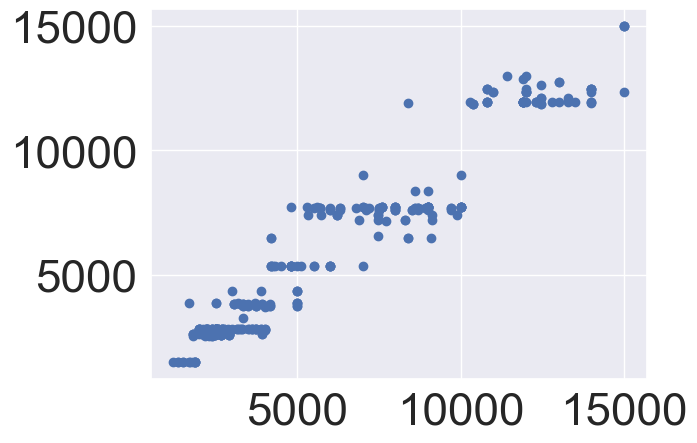

In [78]:
abr = AdaBoostRegressor(dtr)
abr.fit(x_train_sca,y_train)
abry_pred = abr.predict(x_test_sca)
abr1 = metrics.r2_score(y_test,abry_pred)

print('Training  : ',abr.score(x_train_sca,y_train))
print('Testing : ',abr.score(x_test_sca,y_test))

recheck = cross_val_score(abr,x,y,cv=15)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=abry_pred)

[0.89098631 0.90600255 0.90593196 0.91525993 0.83786171 0.87608838
 0.84712656 0.78143075 0.84206151 0.83703575 0.83608441 0.8181717
 0.77097664 0.81746369 0.71390068]
0.839758833598347
Training  :  0.9277499325220718
Testing :  0.9237011214681479


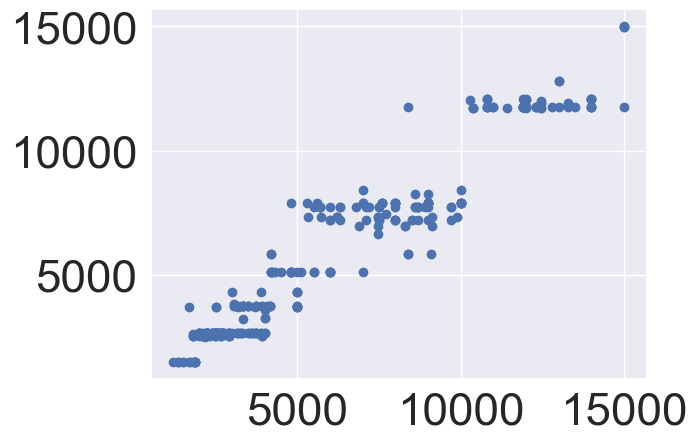

In [79]:
Regressor = [('RandomForestRegressor',rfr),('GradientBoostingRegressor',gbr),('BaggingRegressor',br),('KNeighborsRegressor',knr)]
vc= VotingRegressor(estimators=Regressor)
vc.fit(x_train_sca,y_train)
vcy_pred = vc.predict(x_test_sca)

recheck = cross_val_score(vc,x,y,cv=15)
print(recheck)
print(recheck.mean())

print('Training  : ',vc.score(x_train_sca,y_train))
print('Testing : ',vc.score(x_test_sca,y_test))

plt.scatter(x=y_test,y=vcy_pred)

In [80]:
import joblib
joblib.dump(br,'shoes_price.obj')

['shoes_price.obj']

In [81]:
# Almost every evry model gives more than 90% acuuracy but we choose BaggingRegressor because it's mean of cross_val_score is highest